# Imports and Data loading/Setup

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
# import traintestsplit
from sklearn.model_selection import train_test_split
# import crossval score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

# import metrics
from sklearn.metrics import mean_squared_error, r2_score
# set pd options to display all columns
pd.set_option('display.max_columns', None)
figure_number = 1 # initialize figure number
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
original_train = train.copy() # make a copy of the original data
original_test = test.copy() # keep a copy of the original data
print("Data loaded from train/test cleaned csv files.")

features_before_selection = train.columns
feature_count_before_selection = len(features_before_selection) # will be used later to compare the number of features before and after selection

# I want to immedietely correct the column names to make them easier to work with. snake_case is the standard for python.
train.columns = [str(col).replace(' ','_').lower() for col in train.columns]
original_train.columns = [str(col).replace(' ','_').lower() for col in original_train.columns]

# To make sure the columns are the same in both dataframes, I will use the same code for the test dataframe.
test.columns = [str(col).replace(' ','_').lower() for col in test.columns]
original_test = [str(col).replace(' ','_').lower() for col in original_test.columns]

Data loaded from train/test cleaned csv files.


In [344]:
# Generate the Baseline Model
# The baseline model is the model that is used to compare the performance of the other models. It is the simplest model that can be used to predict the target variable. In this case, the baseline model is the mean of the target variable.
# The baseline model is used to determine if the other models are better than the baseline model. If the other models are better than the baseline model, then the other models are useful. If the other models are not better than the baseline model, then the other models are not useful.

# Baseline Model
baseline_model = train['saleprice'].mean() # 181469.70160897123
# The baseline model is the mean of the target variable. The baseline model is used to determine if the other models are better than the baseline model. If the other models are better than the baseline model, then the other models are useful. If the other models are not better than the baseline model, then the other models are not useful.


# EDA

In [345]:
train.shape, test.shape

((2051, 81), (878, 80))

In [346]:
# Drop all columns with more than 50% missing values (NaN)
train = train.dropna(thresh=len(train)*0.5, axis=1)

#? Note: should I be dropping this from the test set?
test = test.dropna(thresh=len(test)*0.5, axis=1)

In [347]:
train.shape, test.shape

((2051, 77), (878, 76))

In [348]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [349]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   lot_shape        2051 non-null   object 
 8   land_contour     2051 non-null   object 
 9   utilities        2051 non-null   object 
 10  lot_config       2051 non-null   object 
 11  land_slope       2051 non-null   object 
 12  neighborhood     2051 non-null   object 
 13  condition_1      2051 non-null   object 
 14  condition_2      2051 non-null   object 
 15  bldg_type        2051 non-null   object 
 16  house_style      2051 non-null   object 
 17  overall_qual  

In [350]:
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


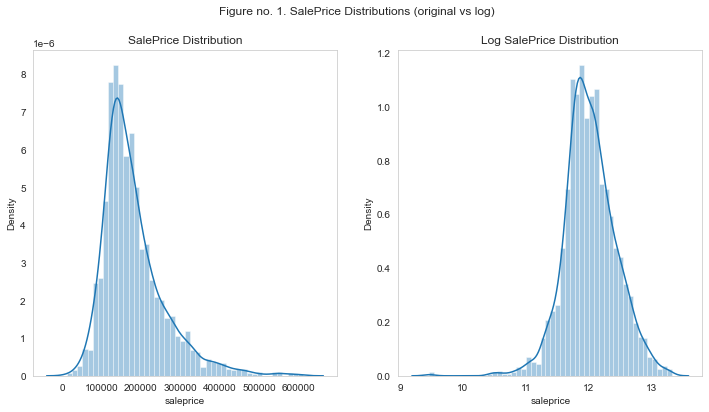

In [351]:
# Examine the distributions for these variables
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(train['saleprice'], ax=ax[0])
sns.distplot(np.log(train['saleprice']), ax=ax[1])
ax[0].set_title('SalePrice Distribution')
ax[1].set_title('Log SalePrice Distribution')
plt.suptitle(f'Figure no. {figure_number}. SalePrice Distributions (original vs log)')
plt.show();


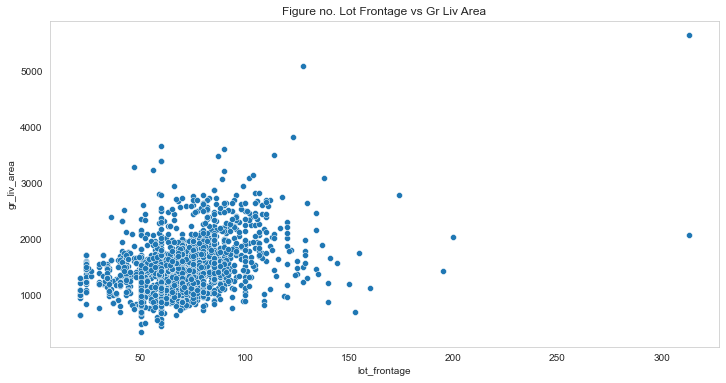

In [352]:
# I also would like to check the relationship between lot_frontage and gr_liv_area
figure_number = 2
figure = plt.figure(figsize=(12,6))
sns.scatterplot(x='lot_frontage', y='gr_liv_area', data=train)
plt.title(f'Figure no. Lot Frontage vs Gr Liv Area')
plt.savefig(f'../images/figure_no_{figure_number}_lot_frontage_vs_gr_liv_area.png')
plt.show();

Lot frontage has an outlier beyond 300 and just under 200.  We will need to deal with these. The histogram shows that we can remove the outliers by capping the lot frontage at 125; however this would result in a loss of 410 rows versus capping at 150 which would result in a loss of 20 rows.  We will cap the lot frontage at 150. Now we have 1660 rows remaining in the dataset.

```python
# I want to remove the outliers from the data
train_tester = train[train['lot_frontage'] < 300]
train_tester2 = train[train['gr_liv_area'] < 4000]
train_tester.value_counts()
```


### Testing this out

# I want to remove the outliers from the data
```python
print(f'removing outliers from the data lot_frontage > 300 and gr_liv_area > 4000')
print(f'lot_frontage > 300')
print(f'original size of train: {train.shape}')
orig_rows = train.shape[0]
train_tester = train[train['lot_frontage'] < 300]
train_tester2 = train[train['gr_liv_area'] < 4000]
train_tester.head()
print(train_tester.shape)
print(train_tester2.shape)
train_tester = train_tester[train_tester['gr_liv_area'] < 4000]
print('removing outliers gr_liv_area < 4000')
print(train_tester.shape)
print(f'rows removed from train: {orig_rows - train_tester.shape[0]}')

```
output:

```bash
removing outliers from the data lot_frontage > 300 and gr_liv_area > 4000
lot_frontage > 300
original size of train: (2051, 77)
(1719, 77)
(2049, 77)
removing outliers gr_liv_area < 4000
(1718, 77)
rows removed from train: 333
```

So, if I removed these outliers from the data I would lose 333 houses.




In [353]:
train.shape

(2051, 77)

In [354]:
# what if I only dropped lot_frontage > 300?
trainee = train[train['lot_frontage'] < 300]
# trainee.shape
# so dropping the outliers didn't help much
train.shape[0] - trainee.shape[0]

# what percent of len(train) is 332? 
332/len(train)


0.16187225743539738

So, if we windsorized our data we would lose 332 houses. which translates to roughly a 16% loss of our our total data. 

In [355]:
# I want to remove the outliers from the data
print(f'removing outliers from the data lot_frontage > 300 and gr_liv_area > 4000')
print(f'lot_frontage > 300')
print(f'original size of train: {train.shape}')
orig_rows = train.shape[0]
train_tester = train[train['lot_frontage'] < 300]
train_tester2 = train[train['gr_liv_area'] < 4000]
train_tester.head()
print(train_tester.shape)
print(train_tester2.shape)
train_tester = train_tester[train_tester['gr_liv_area'] < 4000]
print('removing outliers gr_liv_area < 4000')
print(train_tester.shape)
print(f'rows removed from train: {orig_rows - train_tester.shape[0]}')


removing outliers from the data lot_frontage > 300 and gr_liv_area > 4000
lot_frontage > 300
original size of train: (2051, 77)
(1719, 77)
(2049, 77)
removing outliers gr_liv_area < 4000
(1718, 77)
rows removed from train: 333


/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


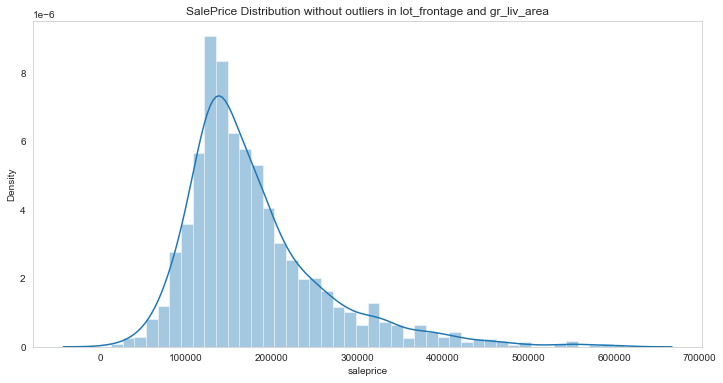

In [356]:
# what does the distribution of saleprice look like if these outliers are removed?
figure_number = 3
figure = plt.figure(figsize=(12,6))
sns.distplot(train_tester['saleprice'])
plt.title('SalePrice Distribution without outliers in lot_frontage and gr_liv_area')
plt.savefig(f'../images/figure_no_{figure_number}_saleprice_minuslotfrontage_grlivarea_outliers_distribution.png')
plt.show();


In [357]:
train['gr_liv_area'].describe()

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: gr_liv_area, dtype: float64

In [358]:
# I want to remove the outliers from the data
train = train[train['lot_frontage'] < 300] # 332 rows removed
train = train[train['gr_liv_area'] < 4000] # 1458 rows removed



I am interested in the impact that basements have on the saleprice, and to further examine this I want to engineer several features that relate to a house's basement.

We are given the feature `bsmt_exposure` in our data which is a measure of how exposed the basement is. It is a categorical feature with the following values:
1. GD - Good Exposure
2. AV - Average Exposure (split levels or foyers typically score average or above)
3. MN - Mimimum Exposure
4. No - No Exposure

I am transforming this feature into a numerical feature by assigning the following values:
1. GD - 3 - This is a fully exposed basement.
2. AV - 2 - This is a basement that is partially exposed.
3. MN - 1 - This is a basement that is minimally exposed and is the least visible besides the below-ground basements in the dataset.
4. No - 0 - This is a basement that is not exposed at all.

# Feature Engineering

`basement_presence` - This feature is an impact measure. It takes from the numerical values I assigned to the `bsmt_exposure` feature and multiplies it by the `total_bsmt_sf` feature. This gives us a measure of the impact that the basement has on the saleprice of the house.

```python
# I want to create a feature that is the impact of the basement on the saleprice
train['basement_presence'] = train['bsmt_exposure'] * train['total_bsmt_sf']
train['basement_presence'].value_counts()
```


In [359]:
# Map the ordinal variables to integers in basement exposure
train['bsmt_exposure'] = train['bsmt_exposure'].map({'No': 0, 'Mn': 0.5, 'Av': 1, 'Gd': 2})
test['bsmt_exposure'] = test['bsmt_exposure'].map({'No': 0, 'Mn': 0.5, 'Av': 1, 'Gd': 2}) #& to the test set as well, so columns match.

In [360]:
# I want to create a feature that is the impact of the basement on the saleprice
# I will do this by multiplying the basement exposure by the basement square footage
try:
    train['bsmt_impact'] = train['bsmt_exposure'] * train['total_bsmt_sf']
    test['bsmt_impact'] = test['bsmt_exposure'] * test['total_bsmt_sf']
except Exception:
    print("Please Run the notebook from the top to the bottom")

The basement is a tricky part of the house to fully capture, as the data is elusive. Our feature `bsmt_qual` is a measure of the height of the basement ceiling but the values are not numerical. We will need to transform this feature into a numerical feature. We will do this by assigning the following values:
1. Ex - Excellent (100+ inches) - 5
2. Gd - Good (90-99 inches) - 4
3. TA - Typical (80-89 inches) - 3
4. Fa - Fair (70-79 inches) - 2
5. Po - Poor (<70 inches) - 1
6. NA - No Basement - 0
source: https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data

```python
# I want to transform the basement quality feature into a numerical feature
train['bsmt_qual'] = train['bsmt_qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
train['bsmt_qual'].value_counts()
```

`basement_height` - This feature is an impact measure. It takes from the numerical values I assigned to the `bsmt_qual` feature and multiplies it by the `total_bsmt_sf` feature. This gives us a measure of the impact that the basement has on the saleprice of the house.

```python
# I want to create a feature that is the impact of the basement on the saleprice
train['basement_volume'] = train['bsmt_qual'] * train['total_bsmt_sf']
train['basement_volume'].value_counts()
```

But How much of the basement is visible to a neighbor? This is a tricky question to answer, but we can get a rough estimate by looking at the `bsmt_exposure` feature and combining it with the new feature `basement_volume` that we created above.

The visible surface area of the basement can be derived by first knowing the volume of the basement and then multiplying that by the ratio of the visible surface area to the total surface area. We can get the ratio of the visible surface area to the total surface area by looking at the `bsmt_exposure` feature. We will do this by assigning the following values:
* Height of basement ceiling - from `bsmt_qual` feature
* Visible surface area of basement (in square feet)

visible_surface_area = height_of_basement_ceiling * total_surface_area_of_basement * 0.25 # just a rough estimate

```python
# I want to create a feature that is the impact of the basement on the saleprice
train['basement_visible_surface_area'] = train['basement_volume'] * 0.25 # just a rough estimate
train['basement_visible_surface_area'].value_counts()
```


In [361]:
# I want to transform the basement quality feature into a numerical feature
train['bsmt_qual'] = train['bsmt_qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
test['bsmt_qual'] = test['bsmt_qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}) #& test set too

In [362]:
# I want to create a feature that is the impact of the basement on the saleprice
train['basement_volume'] = train['bsmt_qual'] * train['total_bsmt_sf']
test['basement_volume'] = test['bsmt_qual'] * test['total_bsmt_sf'] #& I need to do this for the test set as well

In [363]:
# I want to create a feature that is the impact of the basement on the saleprice
train['basement_visible_surface_area'] = train['basement_volume'] * 0.25 # just a rough estimate
test['basement_visible_surface_area'] = test['basement_volume'] * 0.25 #& I need to do this for the test set as well

In [364]:
train['structure_square_footage'] = train['total_bsmt_sf'] + train['1st_flr_sf'] + train['2nd_flr_sf']
test['structure_square_footage'] = test['total_bsmt_sf'] + test['1st_flr_sf'] + test['2nd_flr_sf'] #& I need to do this for the test set as well
train['structure_square_footage'].describe()

count    1717.000000
mean     2524.419918
std       770.081366
min       334.000000
25%      1984.000000
50%      2432.000000
75%      2987.000000
max      5542.000000
Name: structure_square_footage, dtype: float64

In [365]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', '

In [366]:
test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', '

Something is wrong with a house with 334 square feet. I am going to check the price on the house and see if it is a typo.

```python
train[train['structure_square_footage'] == 334] 
```
Yes, this house sold for 39300, and is not a typo. I am going to remove this house from the data.

```python
train = train[train['structure_square_footage'] != 334]
```



In [367]:
train = train[train['structure_square_footage'] != 334] # 1 row removed

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


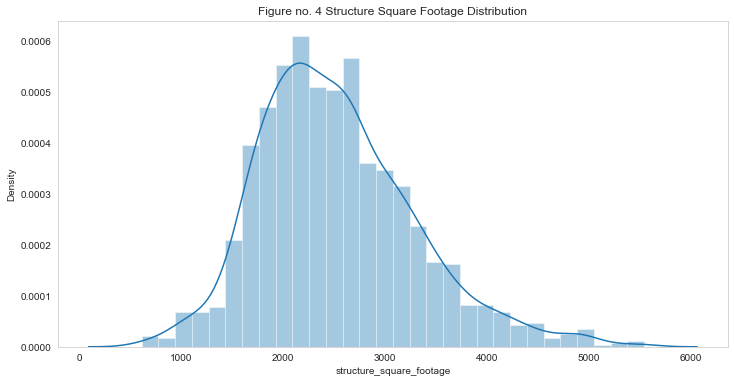

In [368]:
# checking the distribution of structure_square_footage
figure_number = 4
figure = plt.figure(figsize=(12,6))
sns.distplot(train['structure_square_footage'])
plt.title(f'Figure no. {figure_number} Structure Square Footage Distribution')
plt.savefig(f'../images/figure_no_{figure_number}_structure_square_footage_distribution.png')
plt.show();

We also want to engineer the total square footage in the structure. This is the sum of the basement square footage and the first floor and second floor square footage. We will call this feature `structure_square_footage`.

```python
# Creating a feature that is the total square footage of the structure
train['structure_square_footage'] = train['total_bsmt_sf'] + train['1st_flr_sf'] + train['2nd_flr_sf']
train['structure_square_footage'].describe()
```
The `gr_liv_area` feature is the square footage of the house above ground. It would be interesting to see how many of the houses have squarefootage measures (`structure_square_footage`) that are greater than the square footage of the house above ground (`gr_liv_area`). This is an area for future research.



# List of Engineered Features
1. `basement_presence` - This feature is an impact measure. It takes from the numerical values I assigned to the `bsmt_exposure` feature and multiplies it by the `total_bsmt_sf` feature. This gives us a measure of the impact that the basement has on the saleprice of the house.
2. `basement_volume` - This feature is an impact measure. It finds total volume of the basement by multiplying the `bsmt_qual` feature by the `total_bsmt_sf` feature. This gives us a measure of the impact that the basement has on the saleprice of the house.
3. `basement_visible_surface_area` - The visible portion of the basement by rough estimate.
4. `structure_square_footage` - The total square footage of the structure. This is the sum of the basement square footage and the first floor and second floor square footage.

In [369]:
# all the features that have to do with basements:
basement_df = train[['bsmt_exposure', 'total_bsmt_sf', 'bsmt_impact','bsmt_qual','bsmt_cond','bsmtfin_type_1','bsmtfin_type_2']]
basement_df.head()

,bsmt_exposure,total_bsmt_sf,bsmt_impact,bsmt_qual,bsmt_cond,bsmtfin_type_1,bsmtfin_type_2
1,0.0,913.0,0.0,4.0,TA,GLQ,Unf
2,0.0,1057.0,0.0,3.0,TA,GLQ,Unf
3,0.0,384.0,0.0,4.0,TA,Unf,Unf
4,0.0,676.0,0.0,2.0,Gd,Unf,Unf
5,0.0,1517.0,0.0,3.0,TA,ALQ,Rec


To eliminate any potential multicollinearity, I am going to drop the following features that were used to generate the new ones above.
* `bsmt_exposure`
* `bsmtfin_sf_1`
* `bsmtfin_sf_2`
* `1st_flr_sf`
* `2nd_flr_sf`
* `bsmt_qual`
* `total_bsmt_sf`


In [370]:
used_cols = ['bsmt_exposure', 'bsmt_qual', 'total_bsmt_sf','bsmtfin_sf_1', 'bsmtfin_sf_2','1st_flr_sf', '2nd_flr_sf']
train.drop(columns = ['bsmt_exposure', 'bsmt_qual', 'total_bsmt_sf','bsmtfin_sf_1', 'bsmtfin_sf_2','1st_flr_sf', '2nd_flr_sf'], inplace=True)
test.drop(columns = ['bsmt_exposure', 'bsmt_qual', 'total_bsmt_sf','bsmtfin_sf_1', 'bsmtfin_sf_2','1st_flr_sf', '2nd_flr_sf'], inplace=True)
print(f'Removed columns from train: {used_cols}')
print(f'Removed columns from test: {used_cols}') #& I need to do this for the test set as well so the columns match at the end.

Removed columns from train: ['bsmt_exposure', 'bsmt_qual', 'total_bsmt_sf', 'bsmtfin_sf_1', 'bsmtfin_sf_2', '1st_flr_sf', '2nd_flr_sf']
Removed columns from test: ['bsmt_exposure', 'bsmt_qual', 'total_bsmt_sf', 'bsmtfin_sf_1', 'bsmtfin_sf_2', '1st_flr_sf', '2nd_flr_sf']


In [371]:
train['bsmt_impact'].value_counts()

0.0       1129
520.0        5
1094.0       4
1494.0       4
3188.0       3
          ... 
571.0        1
1656.0       1
752.0        1
1153.0       1
1884.0       1
Name: bsmt_impact, Length: 465, dtype: int64

In [372]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_cond,bsmtfin_type_1,bsmtfin_type_2,bsmt_unf_sf,heating,heating_qc,central_air,electrical,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,bsmt_impact,basement_volume,basement_visible_surface_area,structure_square_footage
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,TA,GLQ,Unf,276.0,GasA,Ex,Y,SBrkr,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000,0.0,3652.0,913.00,3035.0
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,GLQ,Unf,326.0,GasA,TA,Y,SBrkr,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000,0.0,3171.0,792.75,2114.0
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,Unf,Unf,384.0,GasA,Gd,Y,SBrkr,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000,0.0,1536.0,384.00,1828.0
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Gd,Unf,Unf,676.0,GasA,TA,Y,SBrkr,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500,0.0,1352.0,338.00,2121.0
5,138,535126040,20,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,ALQ,Rec,557.0,GasA,Ex,Y,SBrkr,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,0,6,2010,WD,190000,0.0,4551.0,1137.75,3405.0


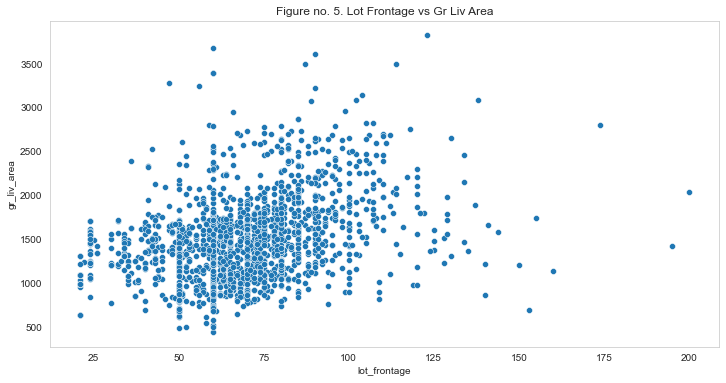

In [373]:
# I also would like to check the relationship between lot_frontage and gr_liv_area
figure_number = 5
figure = plt.figure(figsize=(12,6))
sns.scatterplot(x='lot_frontage', y='gr_liv_area', data=train)
plt.title(f'Figure no. {figure_number}. Lot Frontage vs Gr Liv Area')
plt.savefig(f'../images/figure_no_{figure_number}_lot_frontage_vs_gr_liv_area.png')
plt.show()

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


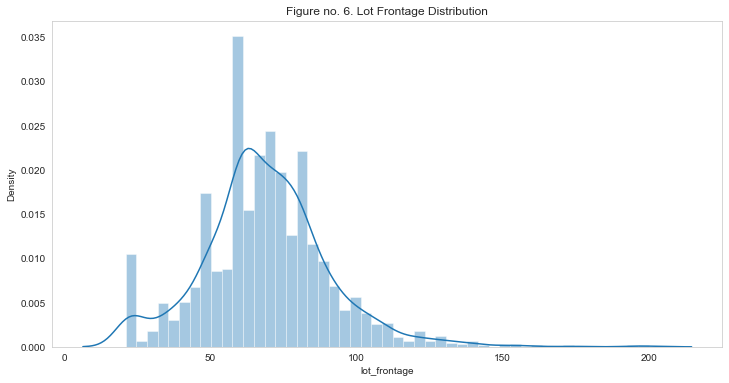

In [374]:
# show the distribution of lot_frontage
figure_number = 6
figure = plt.figure(figsize=(12,6))
sns.distplot(train['lot_frontage'])
plt.title(f'Figure no. {figure_number}. Lot Frontage Distribution')
plt.savefig(f'../images/figure_no_{figure_number}_lot_frontage_distribution.png')
plt.show();

## Some Notes on the Data

1. Pool Area has an average of 2.30 which really doesn't mean very much. It should be noted that the max for pool area is 800 and there are 1889 houses with pools in the Ames dataset.
2. Some houses have 0 for a feature which means that the house does not have that feature.  For example, if a house has 0 for the 3SsnPorch feature, it means that the house does not have a 3 season porch. Introducing a feature with 0 as a value will bias the model by adding complexity without adding any predictive power. We will need to be aware of this during analysis.
3. The features with potentially biasing 0 values are:
   1. 'mas_vnr_area'
   2. 'bsmtfin_sf_1'
   3. 'bsmtfin_sf_2',
   4. 'bsmt_unf_sf'
   5. '2nd_flr_sf',
   6. 'low_qual_fin_sf'
   7.  'wood_deck_sf',
   8.  'open_porch_sf',
   9.  'enclosed_porch',
   10. '3ssn_porch',
   11. 'screen_porch',
   12. 'pool_area'
4. The data is not normalized.  We will need to normalize the data before we can proceed with our analysis using lasso/ridge regression.
5. The average standard deviation of the features included in the model is 3711.5. This is a large standard deviation. Again, normalization will be needed before we can proceed.
6. Lot Area has the largest stdev at 6877.97, if this was standardized to match the other features, the next lowest being 479.85, it may result in better model performance.
7. The average mean of the features values in the data is 9302.92 which is another reason that we have to normalize the data.
   1. Removing saleprice takes the average mean down to 993.55. This is a much more reasonable number. Now the next highest mean is for lot_area and year_remod/add, at 10021.67 and 1982.31 respectively.  This is a much more reasonable number. But it illustrates that years in the data could potentially need to be changed to categorical variables.
8. The features: gr_liv_area, 1st_flr_sf, and total_bsmt_sf have similar mean ranges.
9. The features: bsmtfin_sf_1, bsmtfin_sf_2, and bsmt_unf_sf have similar mean values.
10. bsmt_exposure is 'NA' when the house has no basement.
11. We can use bsmt_exposure to determine if a house has a basement or not, and how visible it is to passing neighbors.

In [375]:
# to prevent any data leakage, I will drop the pid column from the train set
train.drop(columns=['pid'], inplace=True)

Lot frontage appears to have outliers past around 150. Removing the outliers would result in a loss of 333 houses.  We will need to deal with these outliers or accept the loss of these houses. #todo

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


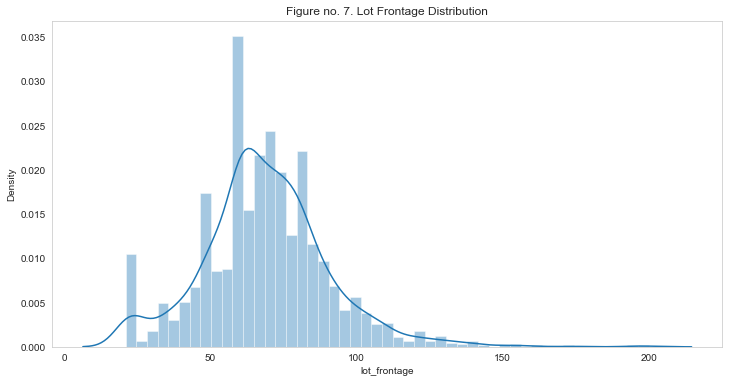

In [376]:
# Show a histogram of the lot frontage
figure = plt.figure(figsize=(12,6))
figure_number = 7
sns.distplot(train['lot_frontage'])
plt.title(f'Figure no. {figure_number}. Lot Frontage Distribution')
plt.savefig(f'../images/figure_no_{figure_number}_lot_frontage_distribution_hist.png')
plt.show();


In [377]:
train[train['year_built'] <= 2010].head()


,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_cond,bsmtfin_type_1,bsmtfin_type_2,bsmt_unf_sf,heating,heating_qc,central_air,electrical,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,bsmt_impact,basement_volume,basement_visible_surface_area,structure_square_footage
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,TA,GLQ,Unf,276.0,GasA,Ex,Y,SBrkr,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000,0.0,3652.0,913.00,3035.0
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,GLQ,Unf,326.0,GasA,TA,Y,SBrkr,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000,0.0,3171.0,792.75,2114.0
3,318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,Unf,Unf,384.0,GasA,Gd,Y,SBrkr,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000,0.0,1536.0,384.00,1828.0
4,255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Gd,Unf,Unf,676.0,GasA,TA,Y,SBrkr,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500,0.0,1352.0,338.00,2121.0
5,138,20,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,ALQ,Rec,557.0,GasA,Ex,Y,SBrkr,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,0,6,2010,WD,190000,0.0,4551.0,1137.75,3405.0


How many houses are there in the dataset that were built after 2006 and before 2008?
```python
train[(train['year_built'] > 2006) & (train['year_built'] < 2008)].shape
```
77 houses were built between 2006 and 2008

In [378]:
thetweeners = train[(train['year_built'] > 2006) & (train['year_built'] < 2008)]
thetweeners.describe()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmt_unf_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,bsmt_impact,basement_volume,basement_visible_surface_area,structure_square_footage
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000,72.000000,77.000000,77.0,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000,77.000000,75.00000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000,77.000000,77.0,77.0,77.000000,77.000000,77.000000,76.000000,77.000000,77.000000,77.000000
mean,1362.545455,45.974026,77.532468,9863.844156,7.623377,5.077922,2007.0,2007.246753,159.722222,840.077922,0.0,1664.272727,0.441558,0.038961,2.025974,0.311688,2.701299,1.0,6.844156,0.649351,2007.12000,2.402597,648.740260,101.701299,83.636364,0.0,3.974026,8.090909,0.0,0.0,6.597403,2007.792208,257800.181818,1079.144737,6024.285714,1506.071429,3039.727273
std,474.536798,37.001413,20.700613,3243.729676,0.987274,0.269807,0.0,0.433949,209.047014,502.264471,0.0,355.298453,0.525495,0.194771,0.323388,0.493637,0.586357,0.0,1.214658,0.506958,0.32715,0.633697,211.420409,92.310555,80.310403,0.0,24.495421,41.168518,0.0,0.0,2.974717,0.800290,79333.249238,1276.195551,2213.655751,553.413938,633.419825
min,38.000000,20.000000,30.000000,3180.000000,5.000000,5.000000,2007.0,2007.000000,0.000000,100.000000,0.0,1092.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.0,5.000000,0.000000,2007.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,2007.000000,146000.000000,0.000000,2432.000000,608.000000,1984.000000
25%,1056.000000,20.000000,64.000000,8232.000000,7.000000,5.000000,2007.0,2007.000000,0.000000,417.000000,0.0,1396.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.0,6.000000,0.000000,2007.00000,2.000000,484.000000,0.000000,24.000000,0.0,0.000000,0.000000,0.0,0.0,5.000000,2007.000000,193000.000000,0.000000,4648.000000,1162.000000,2572.000000
50%,1480.000000,20.000000,77.000000,9965.000000,8.000000,5.000000,2007.0,2007.000000,108.000000,728.000000,0.0,1602.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.0,7.000000,1.000000,2007.00000,2.000000,626.000000,100.000000,53.000000,0.0,0.000000,0.000000,0.0,0.0,7.000000,2008.000000,248328.000000,826.500000,5676.000000,1419.000000,3018.000000
75%,1740.000000,60.000000,89.000000,11830.000000,8.000000,5.000000,2007.0,2007.000000,228.500000,1314.000000,0.0,1800.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2007.00000,3.000000,810.000000,168.000000,120.000000,0.0,0.000000,0.000000,0.0,0.0,8.000000,2008.000000,310013.000000,1665.500000,7910.000000,1977.500000,3420.000000
max,2278.000000,160.000000,134.000000,17169.000000,10.000000,6.000000,2007.0,2008.000000,970.000000,1800.000000,0.0,2696.000000,2.000000,1.000000,3.000000,2.000000,4.000000,1.0,11.000000,2.000000,2008.00000,3.000000,1220.000000,358.000000,368.000000,0.0,153.000000,260.000000,0.0,0.0,12.000000,2010.000000,500067.000000,4836.000000,12090.000000,3022.500000,4882.000000



`mas_vnr_area` is the masonry veneer area in square feet. This means that the house has bricks or stone on the exterior walls. Some houses in the dataset have 0 square feet of mas_vnr_area.

```python
# just show these houses
train.loc[(train['mas_vnr_area'].isnull()) | (train['mas_vnr_area'] == 0)]
```
Doing value counts we can see that...

```python
train['mas_vnr_area'].value_counts()
```
There are 1152 houses that have 0 square feet of mas_vnr_area. This means there must be other types of veneer on the exterior walls.

The table below shows the results of `original_train['mas_vnr_type'].value_counts()`.  This shows that there are 13 houses that have a veneer type of `BrkCmn` and 630 houses that has a veneer type of `BrkFace`. There are also 168 with `Stone`. Finally, 1218 have no masonry on their exterior veneer.


We can see how many houses were remodeled by examining the difference between `year_built` and `year_remod/add`.  If the difference is 0, then the house was not remodeled.  If the difference is greater than 0, then the house was remodeled.

```python
# how many rows in year_remod/add are greater than year_built? This will tell us if we need to drop year_remod/add.
train[train['year_remod/add'] > train['year_built']].shape[0] # how many homes have been remodeled? --> 801
```

```bash
801
```

With only 801 houses having been remodeled, I don't want to add any to the model's complexity by including the `year_remod/add` feature.  I will drop this feature from the model. But it should be noted that this feature could be useful in predicting the saleprice of a house, and may prove valuable in further study.

```python
# drop year_remod/add
train.drop(columns=['year_remod/add'], inplace=True)
test.drop(columns=['year_remod/add'], inplace=True)
```



In [379]:
# how many rows in year_remod/add are greater than year_built? This will tell us if we need to drop year_remod/add.
train[train['year_remod/add'] > train['year_built']].shape[0] # how many homes have been remodeled?

826

In [380]:
# drop year_remod/add
# train.drop(columns=['year_remod/add'], inplace=True)
# test.drop(columns=['year_remod/add'], inplace=True)

# Executive Summary


## Question: Which features would neighbors be able to see?

### Answer: We decided to keep the following variables:
* Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, and Fireplace Qu.
* The square footage of the above-ground structure is a visual factor that will be considered. This includes the following features: Gr Liv Area, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, and Garage Area.
  * for further research we recommend an analysis of any features that could be observed through social media or other online sources that may impact saleprice CCFs. This could include kitchen characteristics, bathroom characteristics, and other features that may be visible in photos. Such a deep dive is beyond the scope of this study.
* The materials used for the construction of the outside of the house are visible and will be included. This includes the following features: Exterior 1st, Exterior 2nd, Mas Vnr Area, and Mas Vnr Type.
  * if possible we will assign higher weights to exterior features that are on the second story of the house. This is because the second story is more visible to neighbors than the first story.
* The final factors that will be considered are `the year the house was built` and the year the house was remodeled. This includes the following features: Year Built, Year Remod/Add, and Yr Sold.

In [381]:
# CCF Features - the features listed above.
ccf_features_basic = ['lot_area', 'garage_type', 'garage_yr_blt',     'garage_finish','garage_area', 'garage_qual', 'garage_cond',
       'kitchen_qual', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area', 'fireplace_qu',
       'gr_liv_area', 'low_qual_fin_sf', 'year_remod/add',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_area', 'mas_vnr_type',
       'year_built', 'yr_sold','bsmt_impact',
       'basement_volume', 'basement_visible_surface_area',
       'structure_square_footage'] + ['saleprice']

#^ I removed garage_cars because the garage is often closed. I want to see if the garage area is a better predictor of saleprice.
#* garage_cars
#^ I removed the 1st_flr_sf and 2nd_flr_sf because I created a feature that is the sum of the 1st and 2nd floor square footage. Keeping them in would be redundant.
#* '1st_flr_sf', '2nd_flr_sf'
#^ I removed bsmt_exposure because I created a feature that is the impact of the basement on the saleprice.
#* bsmt_exposure
#^ I removed 'year_remod/add' because it is potentially biasing the model without adding enough to the value of the model.
#* 'year_remod/add'
#& pool_qc, fence - did not go through the correlation matrix, but still may have value.

#ccf_features_basic = ['1st_flr_sf','2nd_flr_sf','lot_area'] + ['saleprice']


In [382]:
# CCF Features - the features listed above.
train = train[ccf_features_basic] # select only the features listed above
test = test[ccf_features_basic[:-1]] # I want to make sure the test set has the same columns as the train set.

In [383]:
train.head()

,lot_area,garage_type,garage_yr_blt,garage_finish,garage_area,garage_qual,garage_cond,kitchen_qual,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fireplace_qu,gr_liv_area,low_qual_fin_sf,year_remod/add,exterior_1st,exterior_2nd,mas_vnr_area,mas_vnr_type,year_built,yr_sold,bsmt_impact,basement_volume,basement_visible_surface_area,structure_square_footage,saleprice
1,11492,Attchd,1997.0,RFn,559.0,TA,TA,Gd,0,74,0,0,0,0,TA,2122,0,1997,VinylSd,VinylSd,132.0,BrkFace,1996,2009,0.0,3652.0,913.00,3035.0,220000
2,7922,Detchd,1953.0,Unf,246.0,TA,TA,Gd,0,52,0,0,0,0,NaN,1057,0,2007,VinylSd,VinylSd,0.0,None,1953,2010,0.0,3171.0,792.75,2114.0,109000
3,9802,BuiltIn,2007.0,Fin,400.0,TA,TA,TA,100,0,0,0,0,0,NaN,1444,0,2007,VinylSd,VinylSd,0.0,None,2006,2010,0.0,1536.0,384.00,1828.0,174000
4,14235,Detchd,1957.0,Unf,484.0,TA,TA,TA,0,59,0,0,0,0,NaN,1445,0,1993,Wd Sdng,Plywood,0.0,None,1900,2010,0.0,1352.0,338.00,2121.0,138500
5,16492,Attchd,1966.0,Fin,578.0,TA,TA,Gd,0,0,0,0,0,0,Gd,1888,0,2002,BrkFace,Plywood,0.0,None,1966,2010,0.0,4551.0,1137.75,3405.0,190000


columns to dummify: exterior_1st, exterior_2nd, mas_vnr_type, garage_type, garage_finish, garage_qual, garage_cond, pool_qc, fence, fireplace_qu

In [384]:
train.drop(columns=['garage_yr_blt'], inplace=True)

In [385]:
#exterior_1st, exterior_2nd, mas_vnr_type, garage_type, garage_finish, garage_qual, garage_cond, pool_qc, fence, fireplace_qu
dummified_features_df = pd.get_dummies(train, columns=['garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'kitchen_qual', 'fireplace_qu', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type'], drop_first=True)

In [386]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717 entries, 1 to 2050
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   lot_area                       1717 non-null   int64  
 1   garage_type                    1611 non-null   object 
 2   garage_finish                  1610 non-null   object 
 3   garage_area                    1716 non-null   float64
 4   garage_qual                    1610 non-null   object 
 5   garage_cond                    1610 non-null   object 
 6   kitchen_qual                   1717 non-null   object 
 7   wood_deck_sf                   1717 non-null   int64  
 8   open_porch_sf                  1717 non-null   int64  
 9   enclosed_porch                 1717 non-null   int64  
 10  3ssn_porch                     1717 non-null   int64  
 11  screen_porch                   1717 non-null   int64  
 12  pool_area                      1717 non-null   i

Not enough data on garage_type,garage_finish,or garage_cond, or garage_qual, as well as fireplace_qu


In [387]:
# drop those:
train = train.drop(columns=['garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'kitchen_qual', 'fireplace_qu'])

In [388]:
train.head()

,lot_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,gr_liv_area,low_qual_fin_sf,year_remod/add,exterior_1st,exterior_2nd,mas_vnr_area,mas_vnr_type,year_built,yr_sold,bsmt_impact,basement_volume,basement_visible_surface_area,structure_square_footage,saleprice
1,11492,559.0,0,74,0,0,0,0,2122,0,1997,VinylSd,VinylSd,132.0,BrkFace,1996,2009,0.0,3652.0,913.00,3035.0,220000
2,7922,246.0,0,52,0,0,0,0,1057,0,2007,VinylSd,VinylSd,0.0,None,1953,2010,0.0,3171.0,792.75,2114.0,109000
3,9802,400.0,100,0,0,0,0,0,1444,0,2007,VinylSd,VinylSd,0.0,None,2006,2010,0.0,1536.0,384.00,1828.0,174000
4,14235,484.0,0,59,0,0,0,0,1445,0,1993,Wd Sdng,Plywood,0.0,None,1900,2010,0.0,1352.0,338.00,2121.0,138500
5,16492,578.0,0,0,0,0,0,0,1888,0,2002,BrkFace,Plywood,0.0,None,1966,2010,0.0,4551.0,1137.75,3405.0,190000


In [389]:
for col in test.columns:
    if col not in train.columns:
        test.drop(columns=col, inplace=True)
        print(f'Dropped {col} from test set.')
        ccf_features_basic.remove(col) # also remove the column from the list of features

# justification: When testing the model on the test set, I want to make sure the test set has the same columns as the train set.

Dropped garage_type from test set.
Dropped garage_yr_blt from test set.
Dropped garage_finish from test set.
Dropped garage_qual from test set.
Dropped garage_cond from test set.
Dropped kitchen_qual from test set.
Dropped fireplace_qu from test set.


In [390]:
assert(train.shape[1] == test.shape[1]+1)

What kinds of distributions do we have in the data?

In [391]:
train.head()

,lot_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,gr_liv_area,low_qual_fin_sf,year_remod/add,exterior_1st,exterior_2nd,mas_vnr_area,mas_vnr_type,year_built,yr_sold,bsmt_impact,basement_volume,basement_visible_surface_area,structure_square_footage,saleprice
1,11492,559.0,0,74,0,0,0,0,2122,0,1997,VinylSd,VinylSd,132.0,BrkFace,1996,2009,0.0,3652.0,913.00,3035.0,220000
2,7922,246.0,0,52,0,0,0,0,1057,0,2007,VinylSd,VinylSd,0.0,None,1953,2010,0.0,3171.0,792.75,2114.0,109000
3,9802,400.0,100,0,0,0,0,0,1444,0,2007,VinylSd,VinylSd,0.0,None,2006,2010,0.0,1536.0,384.00,1828.0,174000
4,14235,484.0,0,59,0,0,0,0,1445,0,1993,Wd Sdng,Plywood,0.0,None,1900,2010,0.0,1352.0,338.00,2121.0,138500
5,16492,578.0,0,0,0,0,0,0,1888,0,2002,BrkFace,Plywood,0.0,None,1966,2010,0.0,4551.0,1137.75,3405.0,190000


/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please ada

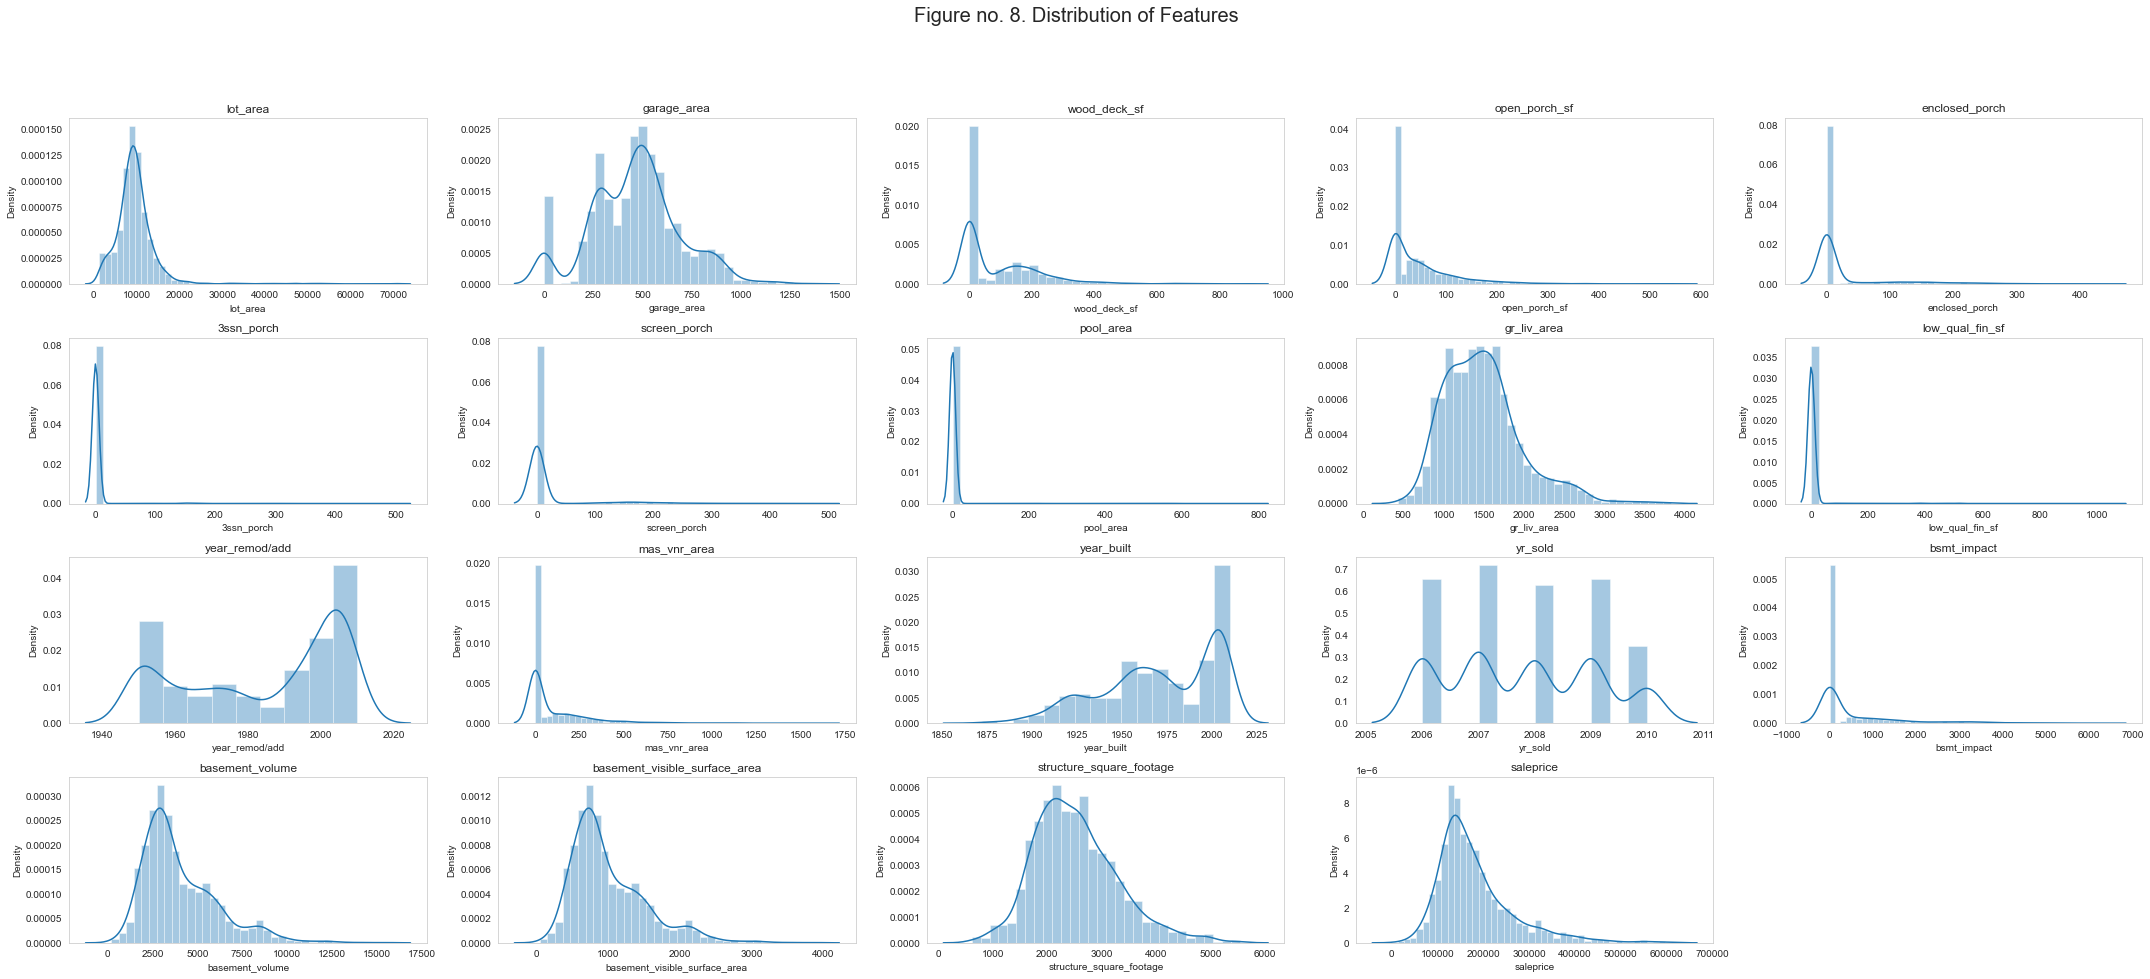

In [392]:
# create a line of subplots, one distplot for each feature
figure_number = 8

# center the plots on the figure 
ax, fig = plt.subplots(figsize=(30,15))
# only plot numeric features
for i, col in enumerate(train.select_dtypes('number').columns):
    plt.subplot(5, 5, i+1)
    sns.distplot(train[col])
    plt.title(col);
figure.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.suptitle(f'Figure no. {figure_number}. Distribution of Features', fontsize=20, y=1.08)
plt.savefig(f'../images/figure_no_{figure_number}_distplots.png')
plt.show();


## Question: Which features matter for my analysis?

### Answer: 
I will use the correlation matrix to find out which features are highly correlated with the target variable (saleprice).

# Analysis

In [393]:
# datatypes
train.dtypes

lot_area                           int64
garage_area                      float64
wood_deck_sf                       int64
open_porch_sf                      int64
enclosed_porch                     int64
3ssn_porch                         int64
screen_porch                       int64
pool_area                          int64
gr_liv_area                        int64
low_qual_fin_sf                    int64
year_remod/add                     int64
exterior_1st                      object
exterior_2nd                      object
mas_vnr_area                     float64
mas_vnr_type                      object
year_built                         int64
yr_sold                            int64
bsmt_impact                      float64
basement_volume                  float64
basement_visible_surface_area    float64
structure_square_footage         float64
saleprice                          int64
dtype: object

I need to dummify exterior_1st, mas_vnr_type, and exterior_2nd.

In [394]:
dummies = pd.get_dummies(train, columns = ['exterior_1st','exterior_2nd','mas_vnr_type'], drop_first=True)
dummies_test = pd.get_dummies(test, columns = ['exterior_1st','exterior_2nd','mas_vnr_type'], drop_first=True)
dummies.head() # is train + dummies


,lot_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,gr_liv_area,low_qual_fin_sf,year_remod/add,mas_vnr_area,year_built,yr_sold,bsmt_impact,basement_volume,basement_visible_surface_area,structure_square_footage,saleprice,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone
1,11492,559.0,0,74,0,0,0,0,2122,0,1997,132.0,1996,2009,0.0,3652.0,913.00,3035.0,220000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,7922,246.0,0,52,0,0,0,0,1057,0,2007,0.0,1953,2010,0.0,3171.0,792.75,2114.0,109000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,9802,400.0,100,0,0,0,0,0,1444,0,2007,0.0,2006,2010,0.0,1536.0,384.00,1828.0,174000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,14235,484.0,0,59,0,0,0,0,1445,0,1993,0.0,1900,2010,0.0,1352.0,338.00,2121.0,138500,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5,16492,578.0,0,0,0,0,0,0,1888,0,2002,0.0,1966,2010,0.0,4551.0,1137.75,3405.0,190000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [395]:
# move saleprice to the end again
saleprice = dummies['saleprice']
dummies.drop(columns=['saleprice'], inplace=True)
dummies['saleprice'] = saleprice
dummies_test.to_csv('../data/test_dummies.csv', index=False)
dummies.to_csv('../data/train_dummies.csv', index=False)
test = pd.read_csv('../data/test_dummies.csv') #& I need to do this for the test set as well
# train = pd.read_csv('../data/train_dummies.csv')
train = dummies
dummies.head()

,lot_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,gr_liv_area,low_qual_fin_sf,year_remod/add,mas_vnr_area,year_built,yr_sold,bsmt_impact,basement_volume,basement_visible_surface_area,structure_square_footage,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,saleprice
1,11492,559.0,0,74,0,0,0,0,2122,0,1997,132.0,1996,2009,0.0,3652.0,913.00,3035.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,220000
2,7922,246.0,0,52,0,0,0,0,1057,0,2007,0.0,1953,2010,0.0,3171.0,792.75,2114.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,109000
3,9802,400.0,100,0,0,0,0,0,1444,0,2007,0.0,2006,2010,0.0,1536.0,384.00,1828.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,174000
4,14235,484.0,0,59,0,0,0,0,1445,0,1993,0.0,1900,2010,0.0,1352.0,338.00,2121.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,138500
5,16492,578.0,0,0,0,0,0,0,1888,0,2002,0.0,1966,2010,0.0,4551.0,1137.75,3405.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,190000


In [396]:
# remove 'exterior_1st','exterior_2nd' and 'mas_vnr_type', from ccf_features_basic
ccf_features_basic.remove('exterior_1st')
ccf_features_basic.remove('exterior_2nd')
ccf_features_basic.remove('mas_vnr_type')
# Reason: I have dummified these columns, so I don't need them anymore.


In [397]:
train.head()

,lot_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,gr_liv_area,low_qual_fin_sf,year_remod/add,mas_vnr_area,year_built,yr_sold,bsmt_impact,basement_volume,basement_visible_surface_area,structure_square_footage,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,saleprice
1,11492,559.0,0,74,0,0,0,0,2122,0,1997,132.0,1996,2009,0.0,3652.0,913.00,3035.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,220000
2,7922,246.0,0,52,0,0,0,0,1057,0,2007,0.0,1953,2010,0.0,3171.0,792.75,2114.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,109000
3,9802,400.0,100,0,0,0,0,0,1444,0,2007,0.0,2006,2010,0.0,1536.0,384.00,1828.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,174000
4,14235,484.0,0,59,0,0,0,0,1445,0,1993,0.0,1900,2010,0.0,1352.0,338.00,2121.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,138500
5,16492,578.0,0,0,0,0,0,0,1888,0,2002,0.0,1966,2010,0.0,4551.0,1137.75,3405.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,190000


/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/2075449792.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


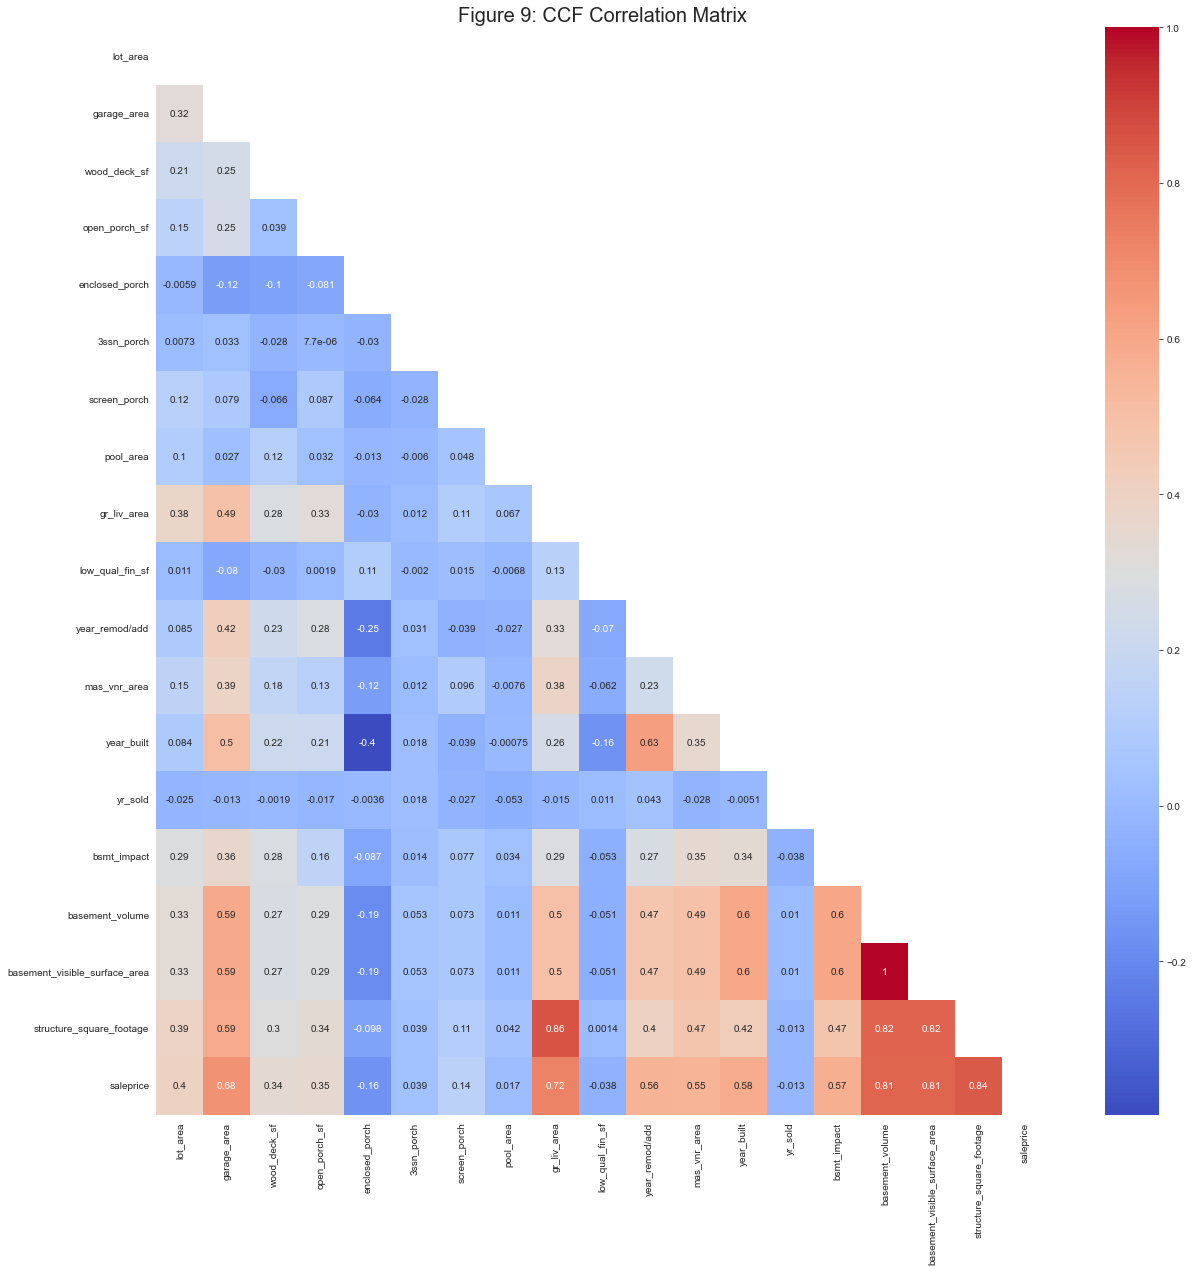

In [398]:
# create a correlation matrix
# of the ccf_features above, I want to determine which are the most highly correlated with saleprice (target).
# I will use the correlation matrix to determine this.
corr_matrix = train[ccf_features_basic].corr()
corr_matrix['saleprice'].sort_values(ascending=False)

# I will use the correlation matrix to determine which features are highly correlated with each other.
# I will use a heatmap to visualize it with a mask over the diagonal.
figure_number  = 9
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap='coolwarm')
# save the plot
plt.title(f'Figure {figure_number}: CCF Correlation Matrix', fontsize=20)
plt.savefig(f'../images/figure_no_{figure_number}_heatmap.png')
plt.show();

I need to determine which features are highly correlated with each other. I will use a heatmap to visualize it with a mask over the diagonal. This is to eliminate multicollinearity.

Analysis:
1. garage_area is highly correlated with garage_cars. To avoid multicollinearity, I will drop garage_cars from the dataset. They have the same correlation with saleprice. Wood deck and open porch also are equally correlated with saleprice. This could indicate a relationship but they are not highly correlated with each other. I will keep both of these features.
2. gr_liv_area is highly correlated with 1st_flr_sf and 2nd_flr_sf. I will keep 1st and 2nd floor variables (which sum to more than the correlation of the gr_liv_area corr) and drop gr_liv_area.



In [399]:
train.columns

Index(['lot_area', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area',
       'gr_liv_area', 'low_qual_fin_sf', 'year_remod/add', 'mas_vnr_area',
       'year_built', 'yr_sold', 'bsmt_impact', 'basement_volume',
       'basement_visible_surface_area', 'structure_square_footage',
       'exterior_1st_AsphShn', 'exterior_1st_BrkComm', 'exterior_1st_BrkFace',
       'exterior_1st_CBlock', 'exterior_1st_CemntBd', 'exterior_1st_HdBoard',
       'exterior_1st_ImStucc', 'exterior_1st_MetalSd', 'exterior_1st_Plywood',
       'exterior_1st_Stone', 'exterior_1st_Stucco', 'exterior_1st_VinylSd',
       'exterior_1st_Wd Sdng', 'exterior_1st_WdShing', 'exterior_2nd_AsphShn',
       'exterior_2nd_Brk Cmn', 'exterior_2nd_BrkFace', 'exterior_2nd_CBlock',
       'exterior_2nd_CmentBd', 'exterior_2nd_HdBoard', 'exterior_2nd_ImStucc',
       'exterior_2nd_MetalSd', 'exterior_2nd_Plywood', 'exterior_2nd_Stone',
       'exterior_2nd_Stucco', '

In [400]:
# dropping columns that are highly correlated with each other as mentioned above.
train.drop(columns=['garage_area'], inplace=True) # highly correlated with garage_cars
train.drop(columns=['gr_liv_area'], inplace=True) # highly correlated with the first and second floor square footage

# also removing them from the list of features
ccf_features_basic.remove('garage_area')
ccf_features_basic.remove('gr_liv_area')

# Dropping base features that were used to create the new features. 
# train.drop(columns=['bsmt_exposure', 'bsmtfin_sf_2', 'bsmt_qual', 'total_bsmt_sf','1st_flr_sf','2nd_flr_sf'], inplace=True)

# ccf_features_basic.remove('bsmt_exposure')
# ccf_features_basic.remove('bsmtfin_sf_2')
# ccf_features_basic.remove('bsmt_qual')
# ccf_features_basic.remove('total_bsmt_sf')
# ccf_features_basic.remove('1st_flr_sf')
# ccf_features_basic.remove('2nd_flr_sf')


In [401]:
train.isnull().sum().sum()

155

There are very few features that have missing values the highest being 22, so I feel comfortable performing a dropna now. 

In [402]:
print(f'train.shape: {train.shape}')
train.dropna(inplace=True)
print(f'train.shape: {train.shape}')

train.shape: (1717, 48)
train.shape: (1653, 48)


In [403]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train[ccf_features_basic].values, i) for i in range(train[ccf_features_basic].shape[1])]
vif["features"] = train[ccf_features_basic].columns
vif.head(100)

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,7.123975e+00,lot_area
1,1.873635e+00,wood_deck_sf
2,1.787575e+00,open_porch_sf
3,1.410759e+00,enclosed_porch
4,1.020081e+00,3ssn_porch
5,1.189818e+00,screen_porch
6,1.023994e+00,pool_area
7,1.054256e+00,low_qual_fin_sf
8,1.700714e+04,year_remod/add
9,1.976142e+00,mas_vnr_area


Any features that have a vif over five will be dropped.


In [404]:
# only include features with a VIF of less than 5 and not equal to 'inf' or np.Inf

vif_to_drop = vif[(vif['VIF Factor'] > 5) & (vif['VIF Factor'] != np.inf) & (vif['VIF Factor'] != 'inf') & (vif['features'] != 'saleprice')]
vif_to_drop.head(15)

,VIF Factor,features
0,7.123975,lot_area
8,17007.142758,year_remod/add
10,9987.023887,year_built
11,17053.422259,yr_sold
15,63.196397,structure_square_footage


In [405]:
# remove features with a VIF of more than 5 from train and ccf_features_basic
print(f'train.shape before removing np.Inf: {train.shape}')
train.drop(columns=vif_to_drop['features'], inplace=True)
for feature in vif_to_drop['features']:
    ccf_features_basic.remove(feature)
print(f'train.shape before removing np.Inf: {train.shape}')

train.shape before removing np.Inf: (1653, 48)
train.shape before removing np.Inf: (1653, 43)


In [406]:
train.head()

,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,low_qual_fin_sf,mas_vnr_area,bsmt_impact,basement_volume,basement_visible_surface_area,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,saleprice
1,0,74,0,0,0,0,0,132.0,0.0,3652.0,913.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,220000
2,0,52,0,0,0,0,0,0.0,0.0,3171.0,792.75,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,109000
3,100,0,0,0,0,0,0,0.0,0.0,1536.0,384.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,174000
4,0,59,0,0,0,0,0,0.0,0.0,1352.0,338.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,138500
5,0,0,0,0,0,0,0,0.0,0.0,4551.0,1137.75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,190000


In [407]:
# remove all np.Inf from train
print(f'train.shape before removing np.Inf: {train.shape}')
train = train.replace(np.inf, np.nan)
print(f'train.shape: {train.shape}')

train.shape before removing np.Inf: (1653, 43)
train.shape: (1653, 43)


In [408]:
train.dtypes

wood_deck_sf                       int64
open_porch_sf                      int64
enclosed_porch                     int64
3ssn_porch                         int64
screen_porch                       int64
pool_area                          int64
low_qual_fin_sf                    int64
mas_vnr_area                     float64
bsmt_impact                      float64
basement_volume                  float64
basement_visible_surface_area    float64
exterior_1st_AsphShn               uint8
exterior_1st_BrkComm               uint8
exterior_1st_BrkFace               uint8
exterior_1st_CBlock                uint8
exterior_1st_CemntBd               uint8
exterior_1st_HdBoard               uint8
exterior_1st_ImStucc               uint8
exterior_1st_MetalSd               uint8
exterior_1st_Plywood               uint8
exterior_1st_Stone                 uint8
exterior_1st_Stucco                uint8
exterior_1st_VinylSd               uint8
exterior_1st_Wd Sdng               uint8
exterior_1st_WdS

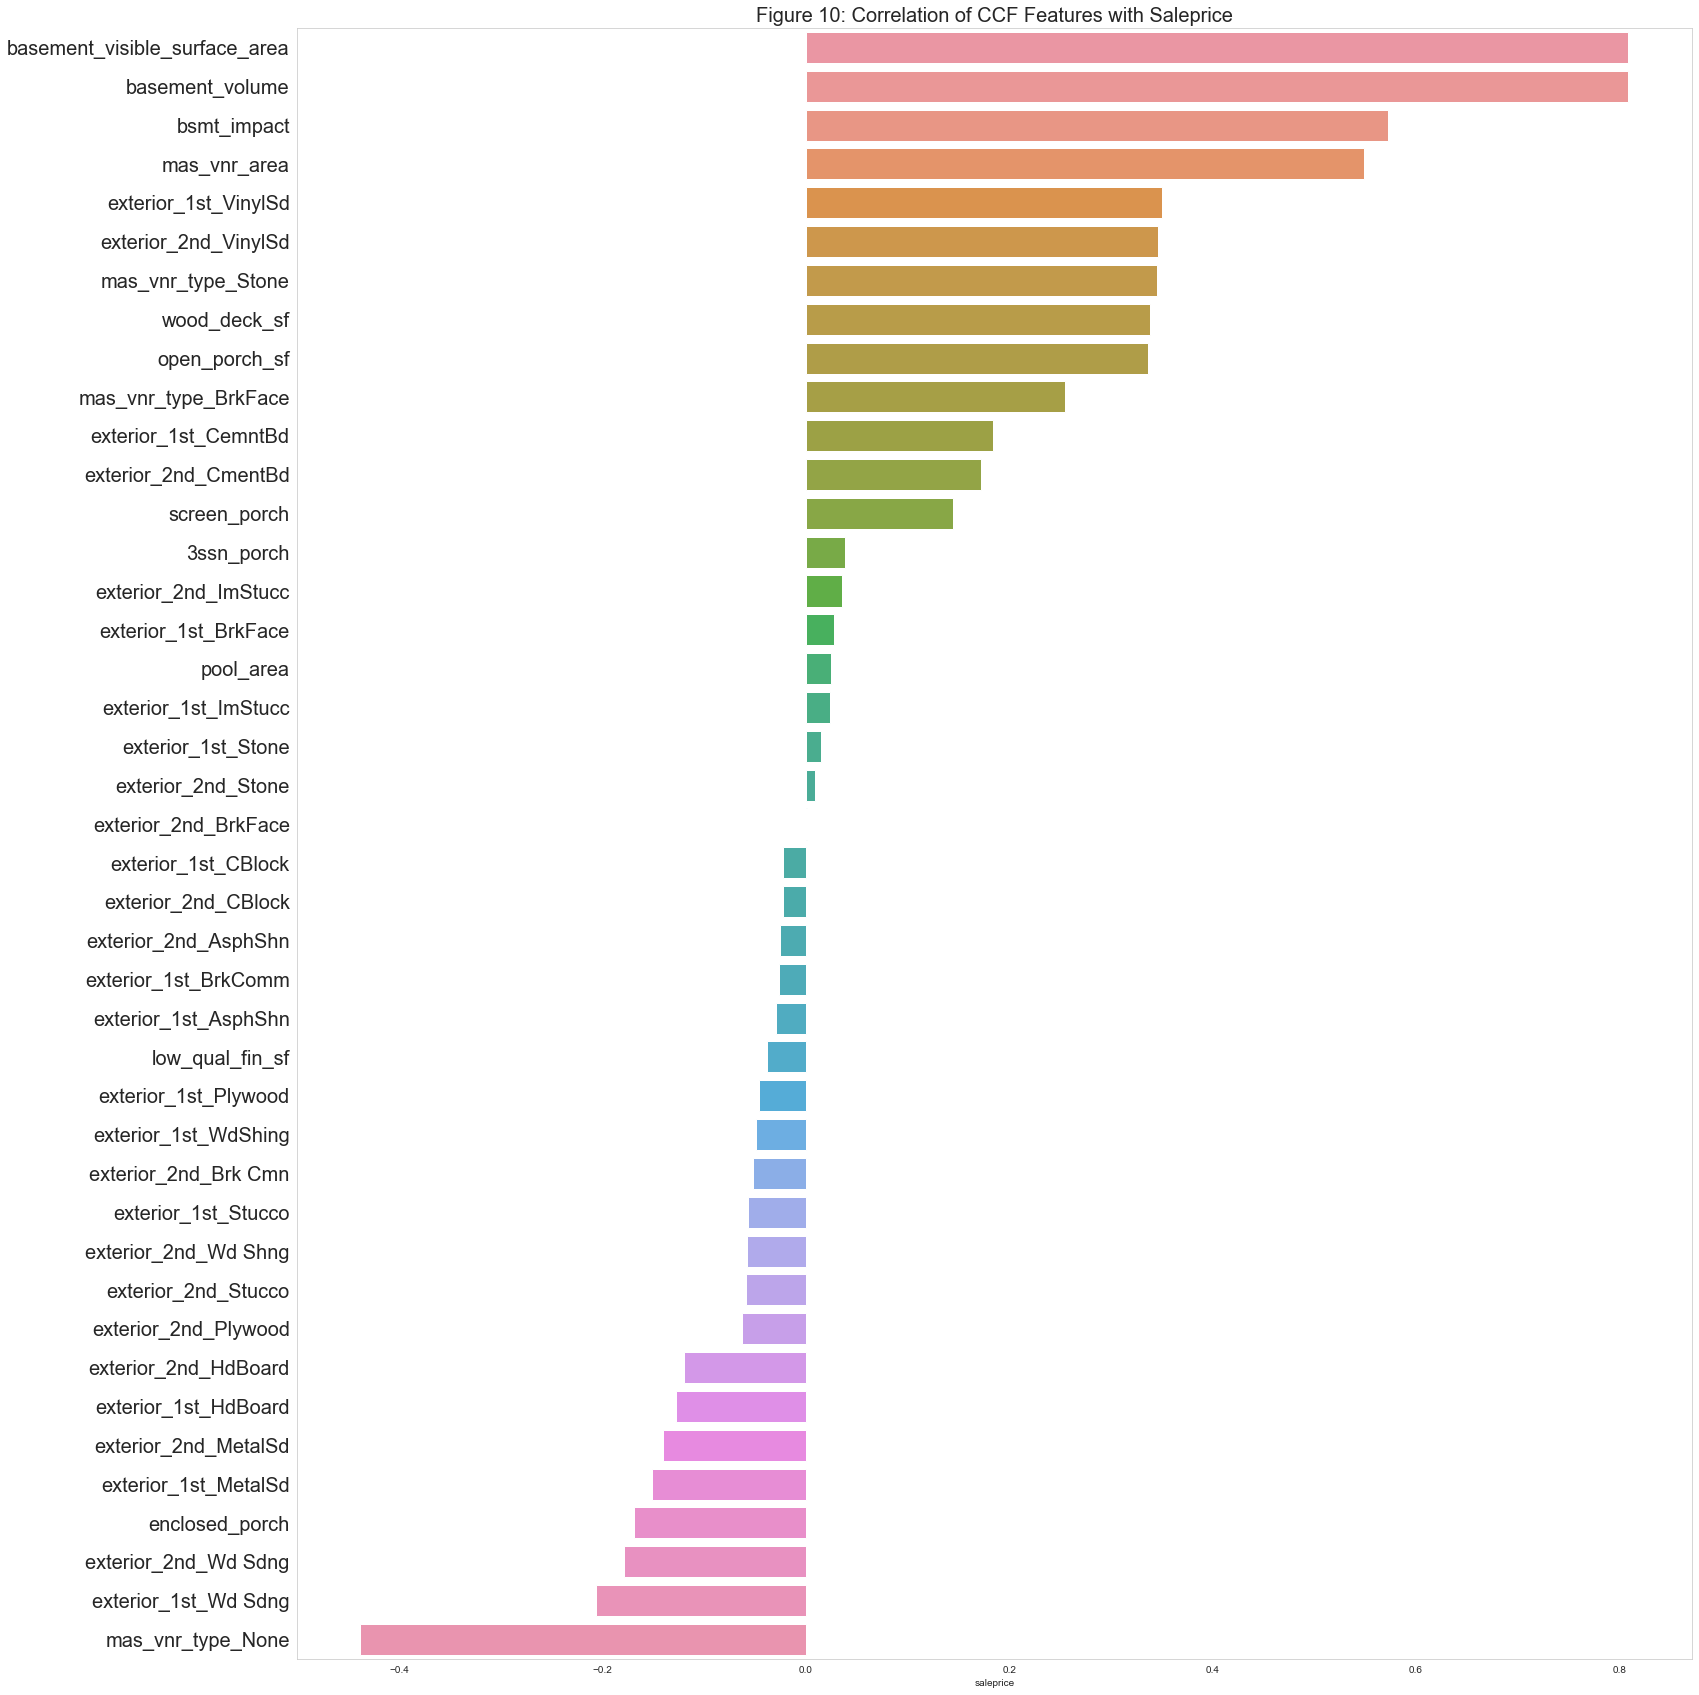

In [409]:
figure_number = 10
plt.figure(figsize=(25,30))
# make barplot of all features and their correlation with saleprice except for the target
sns.barplot(x=train.corr()['saleprice'].sort_values(ascending=False)[1:], y=train.corr()['saleprice'].sort_values(ascending=False)[1:].index)

plt.yticks(fontsize=20)
plt.title(f'Figure {figure_number}: Correlation of CCF Features with Saleprice', fontsize=20)
plt.savefig(f'../images/figure_no_{figure_number}_barplot.png')
plt.show();


The least impactful correlation is between saleprice and the mas_vnr_type being None. So, bricks drive up value potentially.

Creating a figure like the one above to illustrate the coefficients for our linear regression model.


/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/2497277062.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


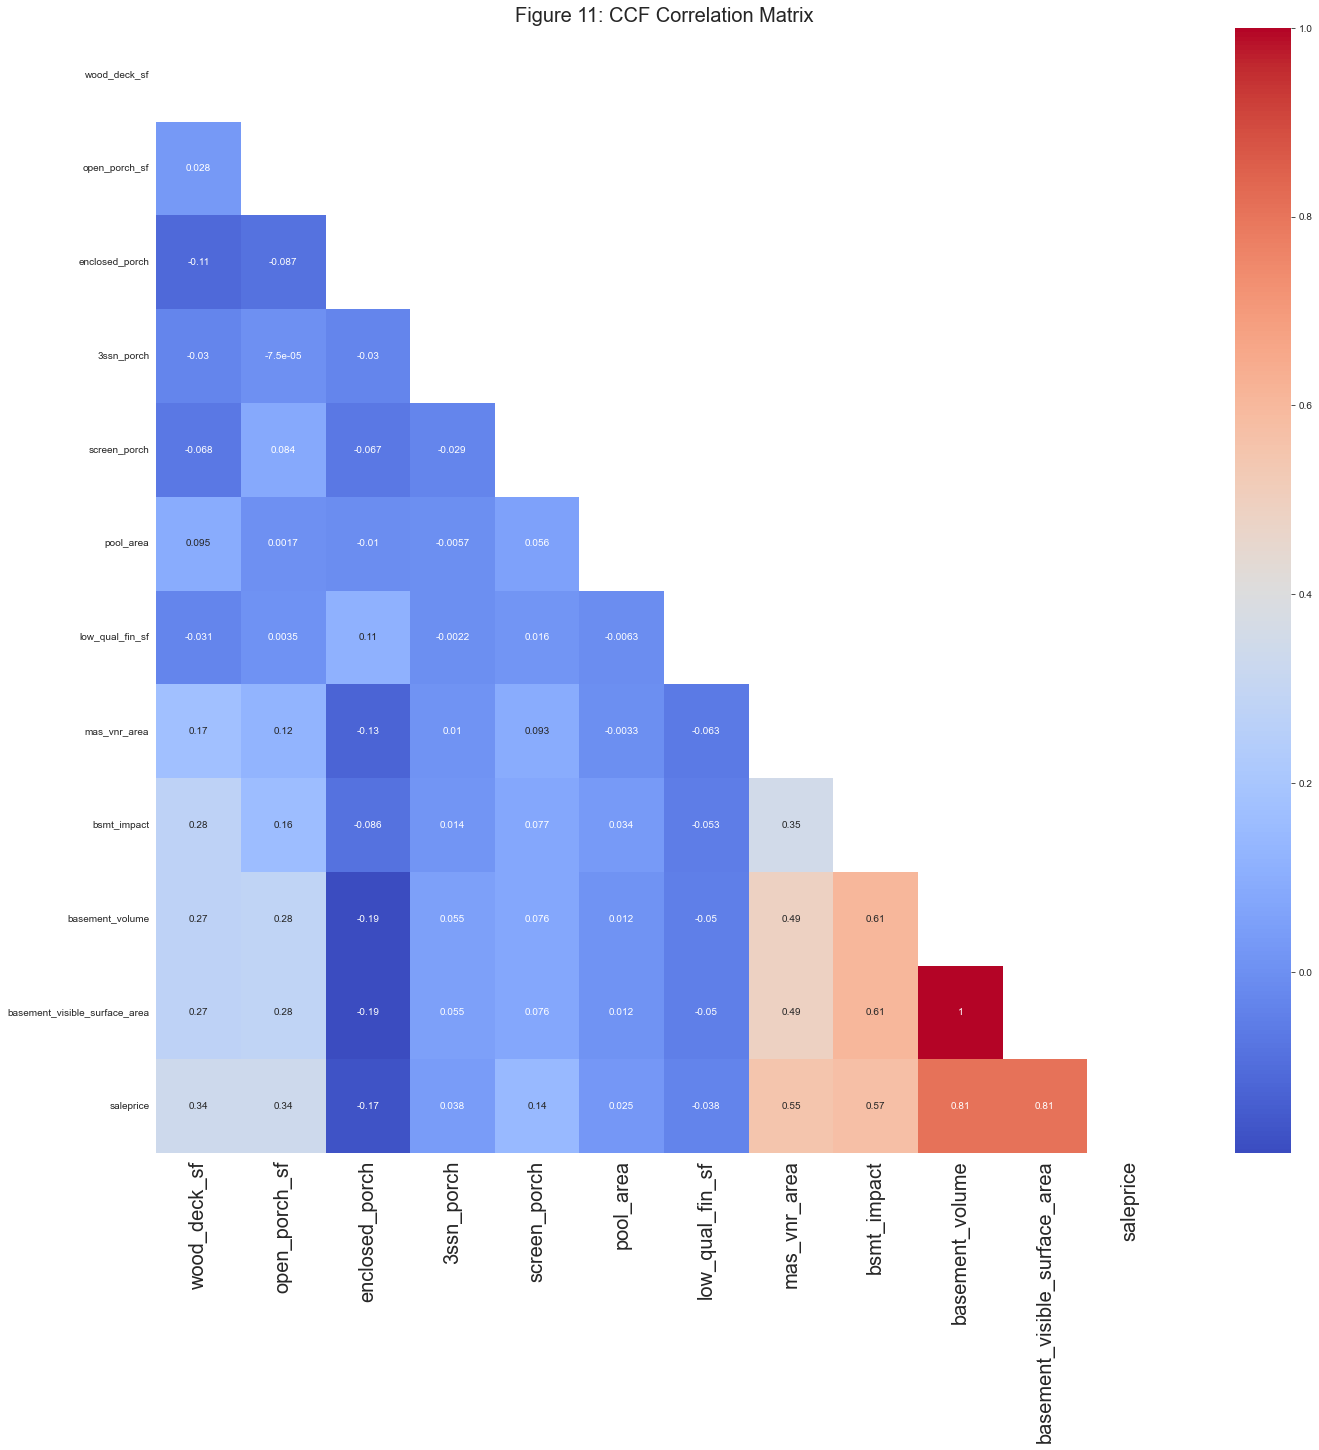

In [410]:
# create a correlation matrix
# of the ccf_features above, I want to determine which are the most highly correlated with saleprice (target).
# I will use the correlation matrix to determine this.
corr_matrix = train[ccf_features_basic].corr()
corr_matrix['saleprice'].sort_values(ascending=False)

# I will use the correlation matrix to determine which features are highly correlated with each other.
# I will use a heatmap to visualize it with a mask over the diagonal.
figure_number = 11
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap='coolwarm',)
# save the plot
plt.xticks(fontsize=20)
plt.tight_layout()
plt.title(f'Figure {figure_number}: CCF Correlation Matrix', fontsize=20)
plt.savefig(f'../images/figure_no_{figure_number}_heatmap.png')

plt.show();

Due to the way we made the basement_visible_surface_area feature, we need to drop basement_volume to avoid multicollinearity.

```python
# drop basement_volume
train.drop(columns=['basement_volume'], inplace=True)
ccf_features_basic.remove('basement_volume') # remove it from features array as well.
```


In [411]:
# drop basement_volume
train.drop(columns=['basement_volume'], inplace=True)
ccf_features_basic.remove('basement_volume') # remove it from features array as well.

/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/1827684471.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


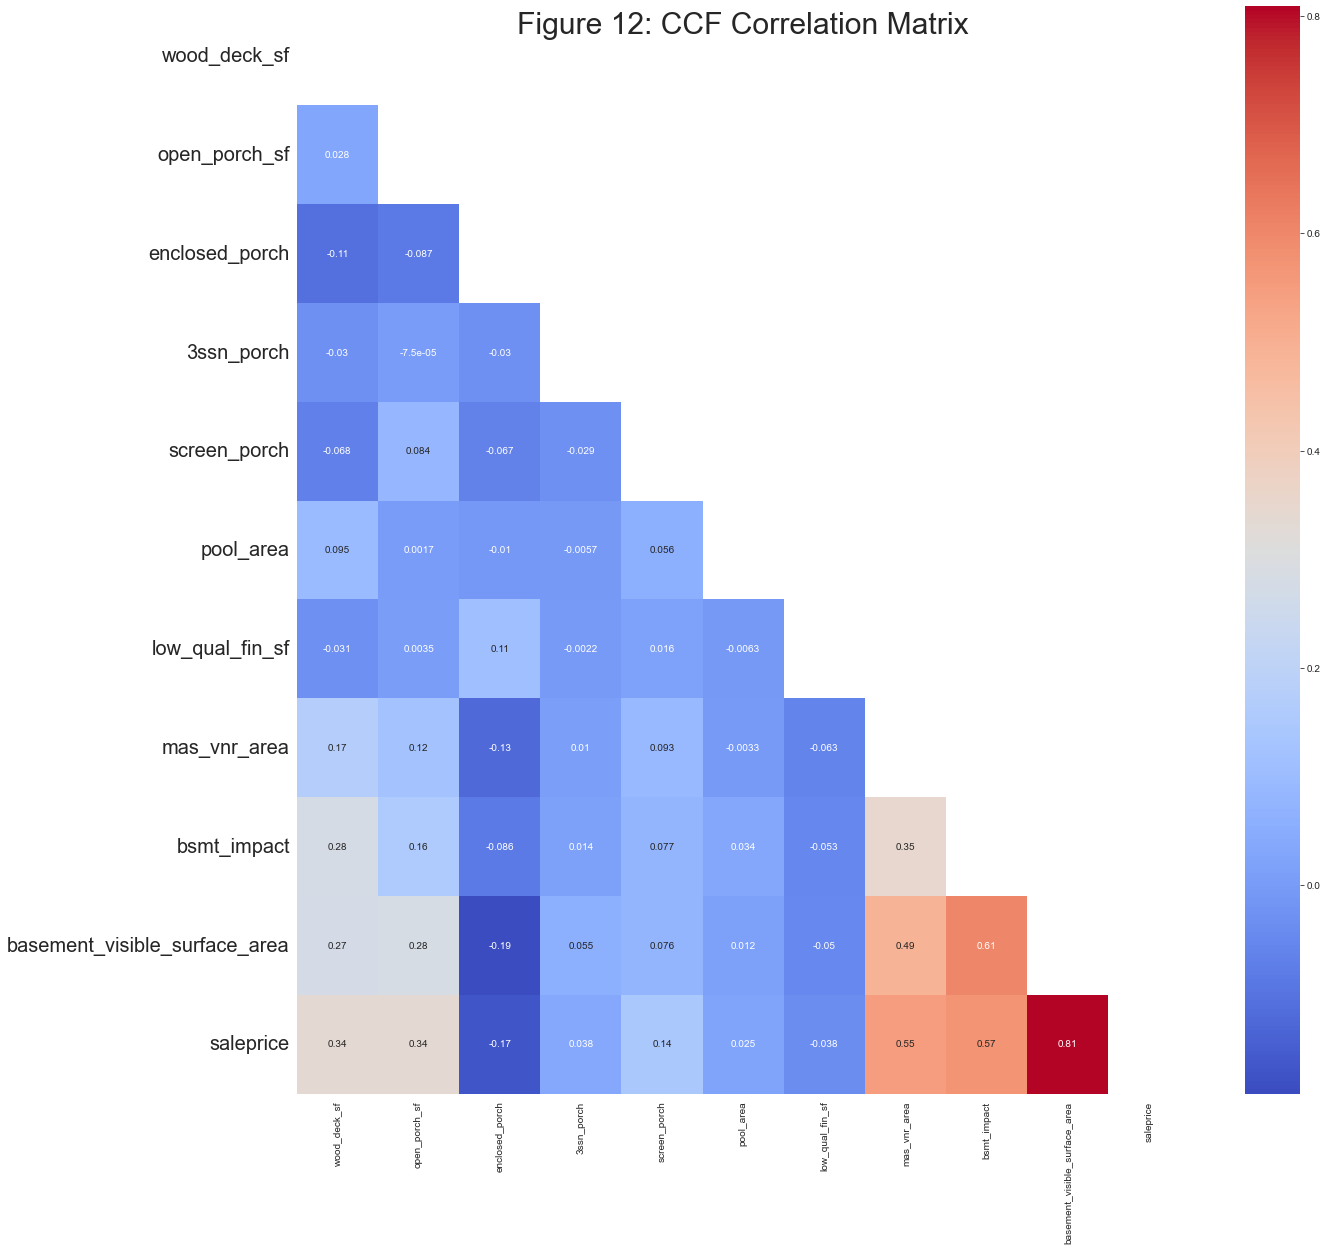

In [412]:
# create a correlation matrix
# of the ccf_features above, I want to determine which are the most highly correlated with saleprice (target).
# I will use the correlation matrix to determine this.
corr_matrix = train[ccf_features_basic].corr()
corr_matrix['saleprice'].sort_values(ascending=False)

# I will use the correlation matrix to determine which features are highly correlated with each other.
# I will use a heatmap to visualize it with a mask over the diagonal.
figure_number = 12
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap='coolwarm')
# save the plot
plt.title(f'Figure {figure_number}: CCF Correlation Matrix', fontsize=30, y=0.97)
plt.yticks(fontsize=20)
# add some padding to the top of the plot


plt.savefig(f'../images/figure_no_{figure_number}_heatmap.png')

plt.show();

In [413]:
# keeping only the features with a correlation of 0.25 or higher with saleprice (in positive or negative direction)
ccf_features = corr_matrix[corr_matrix['saleprice'] > 0.25].index.tolist()
print(ccf_features)

['wood_deck_sf', 'open_porch_sf', 'mas_vnr_area', 'bsmt_impact', 'basement_visible_surface_area', 'saleprice']


Let's look at just the `saleprice` column as a heatmap to see the correlation between the features and the target variable.


```python
# create a heatmap column of all features and their correlation to saleprice
plt.figure(figsize=(12, 12))
sns.heatmap(train[ccf_features_basic].corr()[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features to Saleprice')
plt.show()
```



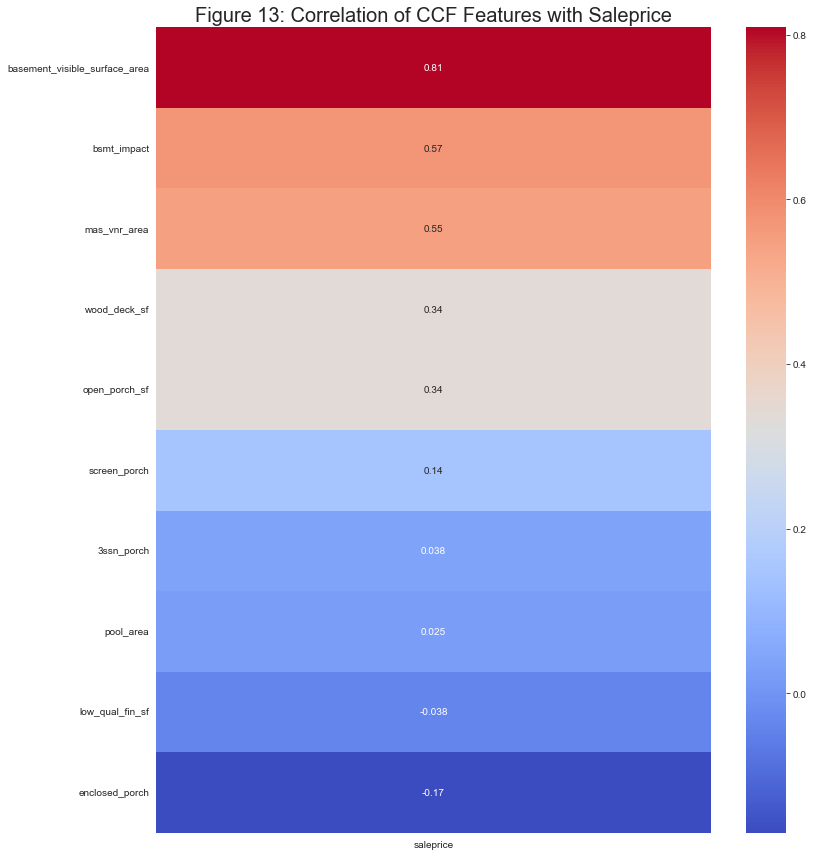

In [414]:
# create a heatmap column of all features and their correlation to saleprice
figure_number = 13

plt.figure(figsize=(12, 12))
sns.heatmap(train[ccf_features_basic].corr()[['saleprice']].sort_values(by='saleprice', ascending=False)[1:], annot=True, cmap='coolwarm')
plt.title(f'Figure {figure_number}: Correlation of CCF Features with Saleprice', fontsize=20)
plt.tight_layout()
plt.savefig(f'../images/figure_no_{figure_number}_singlecolumn_heatmap.png')
plt.show()

# Models

I am going to use a linear regression model to predict the saleprice of a house in Ames, Iowa, and I will use the R2 score to evaluate the model. Secondarily, I will also check a lasso, and ridge regression model to see if they perform better than the linear regression model.

In [415]:
model_scores = pd.DataFrame() # to hold all model scores
# row format will be: model_name, r2 score, rmse score, train_score, test_score, train_rmse, test_rmse, crossval_score
row = {} # to hold a single row of model_scores


In [416]:
train = train[ccf_features]

In [417]:
# the baseline model
# I will use the mean of the saleprice as the baseline model
b = train['saleprice'].mean()

model_predictions = {} # dictionary to store the predictions of the models
model_scores = {} # dictionary to store the scores of the models


## Linear Regression Model


In [418]:
# Building our Model
lr = LinearRegression()
X = train.drop(columns=['saleprice'])
y = train['saleprice'] # target

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42) # split the data into train and validation sets

lr.fit(X_train,y_train) # fit on training data
lr.score(X_train, y_train) # score on training data

# Predictions and Evaluation of the Model
y_val_preds = lr.predict(X_val) # predict on validation data

print(f'training score: {lr.score(X_train, y_train)}') # score on training data
print(f'validataion score: {lr.score(X_val, y_val)}') # score on validation data
print(f'cross_val_score: {cross_val_score(lr, X_train, y_train, cv=5).mean()}') # cross_val_score on training data

lr_score = lr.score(X_val, y_val) # score on validation data
model_scores['lr'] = lr_score # add the score to the model_scores dictionary
model_predictions['lr'] = y_val_preds # add the predictions to the model_predictions dictionary

train_score = lr.score(X_train, y_train) # score on training data
test_score = lr.score(X_val, y_val) # score on validation data
cval_score = cross_val_score(lr, X_train, y_train, cv=5).mean() # score on cross validation data





training score: 0.7194371766494617
validataion score: 0.7086754150296652
cross_val_score: 0.702710876775606


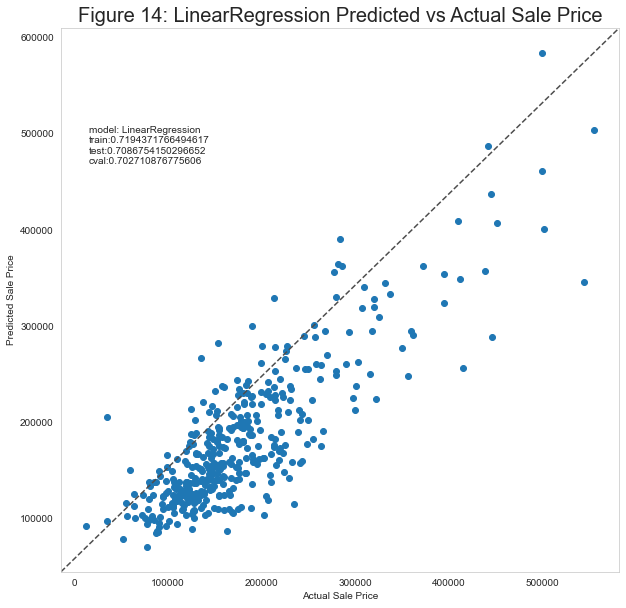

In [419]:
# Plot the predictions vs the actual values
figure_number = 14
model = 'LinearRegression'
plt.figure(figsize=(10, 10))
plt.scatter(y_val, y_val_preds) # plot the predictions vs the actual values
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")
# remove grid
plt.grid(False)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.annotate(f'model: {model} \ntrain:{train_score}\ntest:{test_score}\ncval:{cval_score}', xy=(0.05, 0.75), xycoords='axes fraction')
plt.title(f'Figure {figure_number}: {model} Predicted vs Actual Sale Price', fontsize=20)
plt.savefig(f'../images/figure_no_{figure_number}_{model}_actual_vs_predicted.png')
plt.show();

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


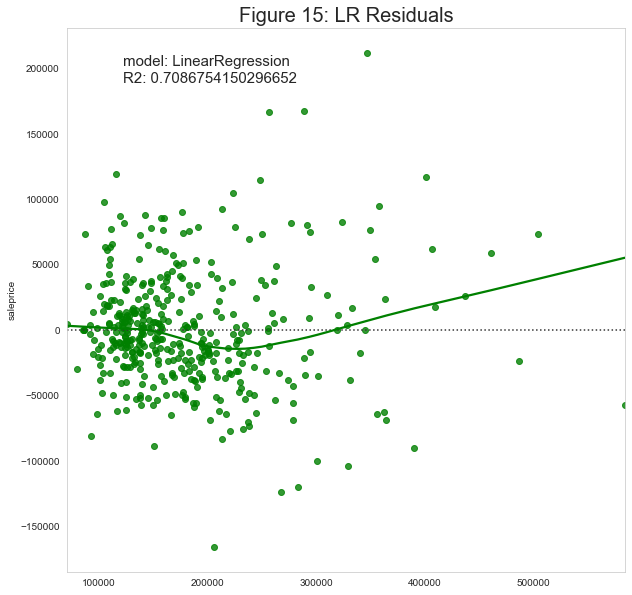

In [420]:
# plot the residuals
figure_number = 15
model = 'LinearRegression'
figure = plt.figure(figsize=(10, 10))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.residplot(y_val_preds, y_val, lowess=True, color="g")
plt.annotate(f'model: {model} \nR2: {lr_score}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15)
plt.title(f'Figure {figure_number}: LR Residuals', fontsize=20)
plt.savefig(f'../images/figure_no_{figure_number}_{model}_residuals.png')
plt.show();


In [421]:
# get the coefficients of the model as a dataframe
lr_coefs = pd.DataFrame(lr.coef_, X.columns, columns=["Coefficients"])


In [422]:

# plot the coefficients
# coefficients[coefficients["Coefficients"] > 0].sort_values(by="Coefficients").plot(kind="barh")
# spread out the y labels

lr_coefs.head(200).sort_values(by="Coefficients", ascending=False)

,Coefficients
open_porch_sf,180.737008
basement_visible_surface_area,94.470076
mas_vnr_area,92.021060
wood_deck_sf,75.698409
bsmt_impact,7.648237


In [423]:
# Inference variables
coefficients = lr_coefs # set to linear regression

largest_coef_value = coefficients['Coefficients'].sort_values(ascending=False)[0]
largest_coef_feature = coefficients['Coefficients'].sort_values(ascending=False).index[0]
smallest_coef_value = coefficients['Coefficients'].sort_values(ascending=False)[-1]
smallest_coef_feature = coefficients['Coefficients'].sort_values(ascending=False).index[-1]

# Inference on the coefficients
print(f'A one unit increase in {largest_coef_feature}, holding all other features constant, will result in a {coefficients.loc[largest_coef_feature, "Coefficients"]} increase in saleprice.')

print(f'A one unit decrease in {smallest_coef_feature}, holding all other features constant, will result in a {coefficients.loc[smallest_coef_feature, "Coefficients"]} increase in saleprice.')

largest_coefs_four_lr = coefficients['Coefficients'].sort_values(ascending=False)[0:4]
smallest_coefs_four_lr = coefficients['Coefficients'].sort_values(ascending=False)[-4:]


A one unit increase in open_porch_sf, holding all other features constant, will result in a 180.7370080155755 increase in saleprice.
A one unit decrease in bsmt_impact, holding all other features constant, will result in a 7.64823663970202 increase in saleprice.


In [424]:
model_scores_df = pd.DataFrame() # to hold all model scores

In [425]:
# add the model scores to the model_scores dataframe
row['model_name'] = 'LinearRegression'
row['r2_score'] = lr_score
row['rmse_score'] = np.sqrt(mean_squared_error(y_val, y_val_preds))
row['train_score'] = train_score
row['test_score'] = test_score
row['cval_score'] = cval_score
row = pd.DataFrame(row, index=[0])
model_scores_df = model_scores_df.append(row, ignore_index=True)
# row format will be: model_name, r2 score, rmse score, train_score, test_score, train_rmse, test_rmse, crossval_score

/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/1819268649.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(row, ignore_index=True)


In [426]:
model_scores_df.head()

,model_name,r2_score,rmse_score,train_score,test_score,cval_score
0,LinearRegression,0.708675,44243.594987,0.719437,0.708675,0.702711


# Lasso Regression Model

In [427]:
# Building our Lasso Model

ss = StandardScaler()

# Init, fit, test Lasso Regressor
alphas = np.logspace(-4, 0, 600) # create a list of alphas to test
lasso = LassoCV(alphas=alphas, cv=5) # create a lasso regression model
X = train.drop(columns=['saleprice'])
y = train['saleprice'] # target

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  random_state=42) # split the data into train and validation sets

X_train_lr = X_train
X_val_lr = X_val
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

lasso.fit(X_train,y_train) # fit on training data


# Predictions and Evaluation of the Model
# y_preds = lasso.predict(X_train) # predict on training data
y_val_preds = lasso.predict(X_val) # predict on validation data

print(f'validataion score: {lasso.score(X_val, y_val)}') # score on validation data

# print(mean_squared_error(y_val, y_preds)) # mean squared error on validation data
# print(r2_score(y_val, y_preds)) # r2 score on validation data

print(f'training score: {lasso.score(X_train, y_train)}') # score on training data

train_score = lasso.score(X_train, y_train) # score on training data
test_score = lasso.score(X_val, y_val) # score on validation data
cval_score = cross_val_score(lasso, X_train, y_train, cv=5).mean() # score on cross validation data

# add the score to the model_scores dictionary
model_scores['lasso'] = lasso.score(X_val, y_val)
# add the predictions to the model_predictions dictionary
model_predictions['lasso'] = y_val_preds


validataion score: 0.7086754152423413
training score: 0.7194371766494617


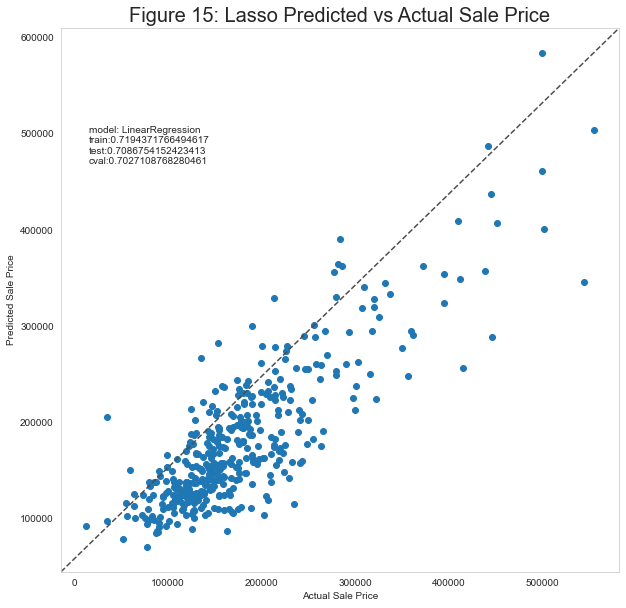

In [428]:
# Plot the predictions vs the actual values
figure_number = 15
model_name = 'Lasso'
plt.figure(figsize=(10, 10))
plt.scatter(y_val, y_val_preds) # plot the predictions vs the actual values
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.annotate(f'model: {model} \ntrain:{train_score}\ntest:{test_score}\ncval:{cval_score}', xy=(0.05, 0.75), xycoords='axes fraction')
plt.title(f'Figure {figure_number}: Lasso Predicted vs Actual Sale Price', fontsize=20)
plt.savefig(f'../images/figure_no_{figure_number}_{model_name}_actual_vs_predicted.png')
lasso_score = lasso.score(X_val, y_val)

plt.show()

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


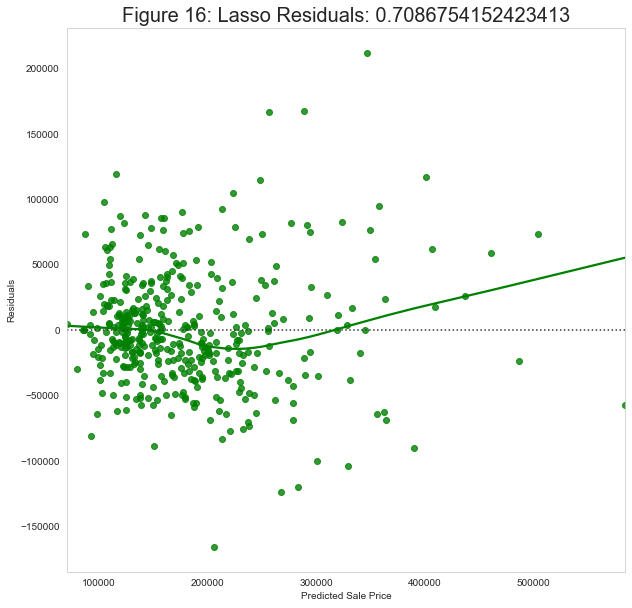

In [429]:
# plot the residuals
figure_number = 16
model_name = 'Lasso'
figure = plt.figure(figsize=(10, 10))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.residplot(y_val_preds, y_val, lowess=True, color="g")
plt.ylabel('Residuals')
plt.xlabel('Predicted Sale Price')
plt.title(f'Figure {figure_number}: Lasso Residuals: {lasso.score(X_val,y_val)}', fontsize=20)
plt.savefig(f'../images/figure_no_{figure_number}__{model_name}_residuals.png')
plt.show();


In [430]:
# get the coefficients of the model as a dataframe
figure_number = 17
figure = plt.figure(figsize=(30, 30))
model_name = 'Lasso'
coefficients = pd.DataFrame(lasso.coef_, X.columns, columns=["Coefficients"])


<Figure size 2160x2160 with 0 Axes>

In [431]:
# Inference variables
coefficients = coefficients # set to linear regression

largest_coef_value = coefficients['Coefficients'].sort_values(ascending=False)[0]
largest_coef_feature = coefficients['Coefficients'].sort_values(ascending=False).index[0]
smallest_coef_value = coefficients['Coefficients'].sort_values(ascending=False)[-1]
smallest_coef_feature = coefficients['Coefficients'].sort_values(ascending=False).index[-1]

# Inference on the coefficients
print(f'A one unit increase in {largest_coef_feature}, holding all other features constant, will result in a {coefficients.loc[largest_coef_feature, "Coefficients"]} log-unit increase in saleprice.') # log unit increase, because we are using regularized regression

print(f'A one unit decrease in {smallest_coef_feature}, holding all other features constant, will result in a {coefficients.loc[smallest_coef_feature, "Coefficients"]} log-unit increase in saleprice.')

largest_coefs_four_lasso = coefficients['Coefficients'].sort_values(ascending=False)[0:4]
smallest_coefs_four_lasso = coefficients['Coefficients'].sort_values(ascending=False)[-4:]


A one unit increase in basement_visible_surface_area, holding all other features constant, will result in a 48289.45009779756 log-unit increase in saleprice.
A one unit decrease in bsmt_impact, holding all other features constant, will result in a 7487.262665572547 log-unit increase in saleprice.


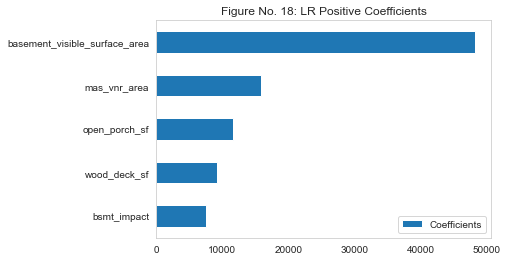

In [432]:

# plot the coefficients
figure_number = 18
coefficients[coefficients["Coefficients"] > 0].sort_values(by="Coefficients").plot(kind="barh")
# spread out the y labels
plt.yticks(rotation=0)
plt.title(f'Figure No. {figure_number}: LR Positive Coefficients')
plt.savefig(f"../images/figure_no_{figure_number}_{model_name}_positivecoefficients.png")
plt.show();



In [433]:
# add the model scores to the model_scores dataframe
row['model_name'] = 'Lasso'
row['r2_score'] = lasso_score
row['rmse_score'] = np.sqrt(mean_squared_error(y_val, y_val_preds))
row['train_score'] = train_score
row['test_score'] = test_score
row['cval_score'] = cval_score
row = pd.DataFrame(row, index=[0])

# row format will be: model_name, r2 score, rmse score, train_score, test_score, train_rmse, test_rmse, crossval_score

In [434]:

model_scores_df = model_scores_df.append(row, ignore_index=True)


/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/3931623843.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(row, ignore_index=True)


# Ridge Regression Model

In [435]:
# Building our Ridge Model

ridge = Ridge()
X = train.drop(columns=['saleprice'])
y = train['saleprice'] # target

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42) # split the data into train and validation sets

X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

ridge.fit(X_train,y_train) # fit on training data

# Predictions and Evaluation of the Model
y_preds = ridge.predict(X_train) # predict on training data
y_val_preds = ridge.predict(X_val) # predict on validation data


ridge.score(X_train, y_train) # score on training data
ridge_score = ridge.score(X_val, y_val)
print(f'validataion score: {ridge.score(X_val, y_val)}') # score on validation data
print(f'training score: {ridge.score(X_train, y_train)}') # score on training data
train_score = ridge.score(X_train, y_train) # score on training data
test_score = ridge.score(X_val, y_val) # score on validation data
cval_score = cross_val_score(ridge, X_train, y_train, cv=5).mean() # score on cross validation data

print(f'cross_val_score (train): {cross_val_score(ridge, X_train, y_train, cv=5).mean()}') # cross_val_score on training data
print(f'cross_val_score (validation): {cross_val_score(ridge, X_train, y_train, cv=5).mean()}') # cross_val_score on training data

# add the score to the model_scores dictionary
model_scores['ridge'] = ridge.score(X_val, y_val)
# add the predictions to the model_predictions dictionary
model_predictions['ridge'] = y_val_preds


validataion score: 0.7087241178620812
training score: 0.7194368668850205
cross_val_score (train): 0.7027186938582479
cross_val_score (validation): 0.7027186938582479


In [436]:
row['model_name'] = 'Ridge'
row['r2_score'] = ridge.score(X_val, y_val)
row['rmse_score'] = np.sqrt(mean_squared_error(y_val, y_val_preds))
row['train_score'] = train_score
row['test_score'] = test_score
row['cval_score'] = cval_score
row = pd.DataFrame(row, index=[0])
model_scores_df = model_scores_df.append(row, ignore_index=True)

/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/2603771631.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(row, ignore_index=True)


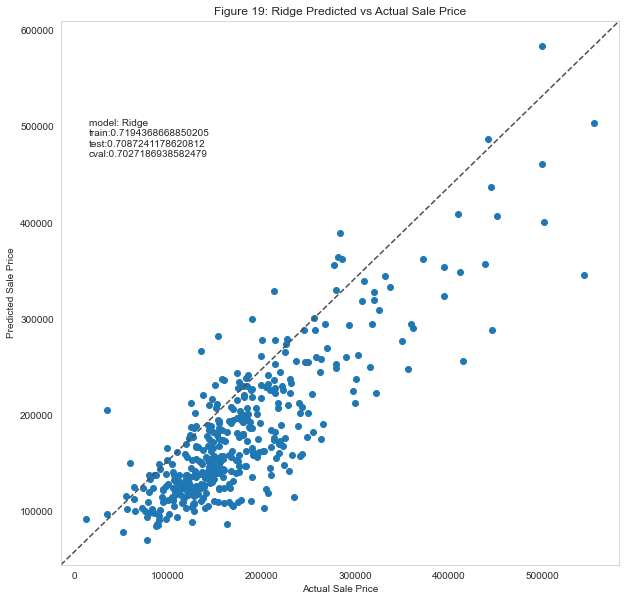

In [437]:
# Plot the predictions vs the actual values
figure_number = 19
model = 'Ridge'
plt.figure(figsize=(10, 10))
plt.scatter(y_val, y_val_preds) # plot the predictions vs the actual values
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.annotate(f'model: {model} \ntrain:{train_score}\ntest:{test_score}\ncval:{cval_score}', xy=(0.05, 0.75), xycoords='axes fraction')
plt.title(f'Figure {figure_number}: {model} Predicted vs Actual Sale Price')
plt.savefig(f'../images/figure_no_{figure_number}_{model}_actual_vs_predicted.png')
plt.show();

/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


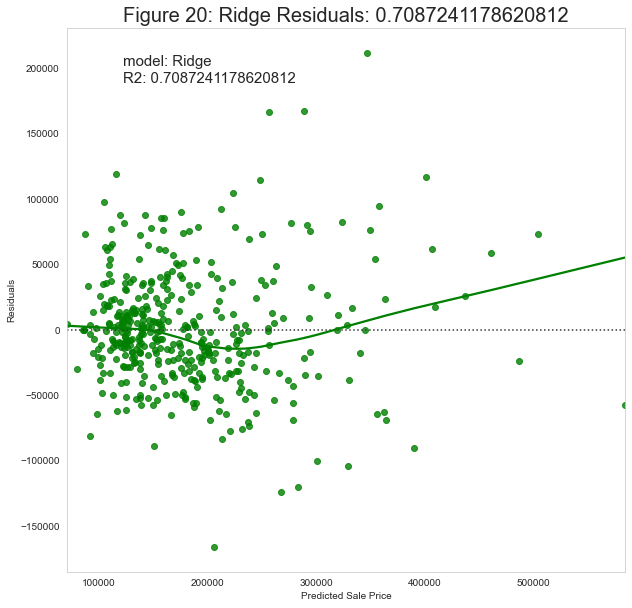

In [438]:
# plot the residuals
figure_number = 20
model = 'Ridge'
figure = plt.figure(figsize=(10, 10))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.residplot(y_val_preds, y_val, lowess=True, color="g")
plt.title(f'Figure {figure_number}: {model} Residuals: { ridge.score(X_val, y_val)}', fontsize=20)
plt.annotate(f'model: {model} \nR2: {ridge_score}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15)
plt.ylabel('Residuals')
plt.xlabel('Predicted Sale Price')
plt.savefig(f'../images/figure_no_{figure_number}_{model}_residuals.png')

ridge_score = ridge.score(X_val, y_val)

plt.show();


In [439]:
# get the coefficients of the model as a dataframe
figure_number = 21
model_name = 'Ridge'
coefficients = pd.DataFrame(ridge.coef_, X.columns, columns=["Coefficients"])
coefficients.head()

,Coefficients
wood_deck_sf,9247.977498
open_porch_sf,11573.790339
mas_vnr_area,15850.879242
bsmt_impact,7516.984753
basement_visible_surface_area,48228.697769


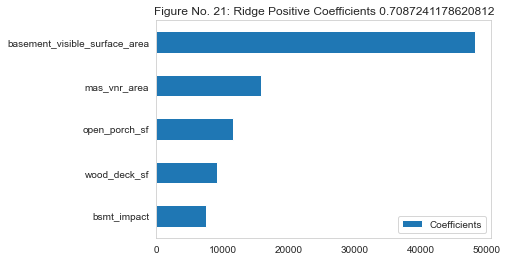

In [440]:
# plot the coefficients
coefficients[coefficients["Coefficients"] > 0].sort_values(by="Coefficients").plot(kind="barh")
# spread out the y labels
plt.yticks(rotation=0)
plt.title(f'Figure No. {figure_number}: {model_name} Positive Coefficients {ridge.score(X_val, y_val)}')

plt.savefig(f"../images/figure_no_{figure_number}_{model_name}_positivecoefficients.png")
plt.show();

In [441]:
# Inference variables
coefficients = coefficients # set to linear regression

largest_coef_value = coefficients['Coefficients'].sort_values(ascending=False)[0]
largest_coef_feature = coefficients['Coefficients'].sort_values(ascending=False).index[0]
smallest_coef_value = coefficients['Coefficients'].sort_values(ascending=False)[-1]
smallest_coef_feature = coefficients['Coefficients'].sort_values(ascending=False).index[-1]

# Inference on the coefficients
print(f'A one unit increase in {largest_coef_feature}, holding all other features constant, will result in a {coefficients.loc[largest_coef_feature, "Coefficients"]} log-unit increase in saleprice.') # log unit increase, because we are using regularized regression

print(f'A one unit decrease in {smallest_coef_feature}, holding all other features constant, will result in a {coefficients.loc[smallest_coef_feature, "Coefficients"]} log-unit increase in saleprice.')

largest_coefs_four_ridge = coefficients['Coefficients'].sort_values(ascending=False)[0:4]
smallest_coefs_four_ridge = coefficients['Coefficients'].sort_values(ascending=False)[-4:]


A one unit increase in basement_visible_surface_area, holding all other features constant, will result in a 48228.69776882344 log-unit increase in saleprice.
A one unit decrease in bsmt_impact, holding all other features constant, will result in a 7516.984753259705 log-unit increase in saleprice.


In [442]:
lr.coef_

array([ 75.69840938, 180.73700802,  92.02106049,   7.64823664,
        94.47007625])

# Elastic Net Model

validataion score: 0.6840971225739905
training score: 0.6822916766355376
cross_val_score (train): 0.6678755412939289
cross_val_score (validation): 0.6678755412939289


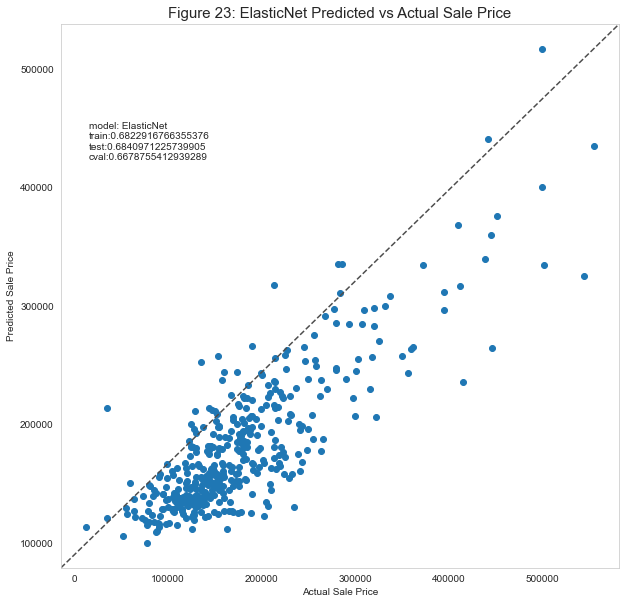

In [443]:

# Building our ElasticNet Model

elasticnet = ElasticNet()
model = 'ElasticNet'

X = train.drop(columns=['saleprice'])
y = train['saleprice'] # target

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42) # split the data into train and validation sets

X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

elasticnet.fit(X_train,y_train) # fit on training data

# Predictions and Evaluation of the Model

y_preds = elasticnet.predict(X_train) # predict on training data
y_val_preds = elasticnet.predict(X_val) # predict on validation data

elasticnet.score(X_train, y_train) # score on training data

print(f'validataion score: {elasticnet.score(X_val, y_val)}') # score on validation data

print(f'training score: {elasticnet.score(X_train, y_train)}') # score on training data

print(f'cross_val_score (train): {cross_val_score(elasticnet, X_train, y_train, cv=5).mean()}') # cross_val_score on training data

print(f'cross_val_score (validation): {cross_val_score(elasticnet, X_train, y_train, cv=5).mean()}') # cross_val_score on training data

# add the score to the model_scores dictionary
model_scores['elasticnet'] = elasticnet.score(X_val, y_val)
# add the predictions to the model_predictions dictionary
model_predictions['elasticnet'] = y_val_preds


train_score = elasticnet.score(X_train, y_train) # score on training data
test_score = elasticnet.score(X_val, y_val) # score on validation data
cval_score = cross_val_score(elasticnet, X_train, y_train, cv=5).mean() # score on cross validation data


# Plot the predictions vs the actual values

figure_number = 23

plt.figure(figsize=(10, 10))

plt.scatter(y_val, y_val_preds) # plot the predictions vs the actual values

plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")

plt.xlabel('Actual Sale Price')

plt.ylabel('Predicted Sale Price')
plt.annotate(f'model: {model} \ntrain:{train_score}\ntest:{test_score}\ncval:{cval_score}', xy=(0.05, 0.75), xycoords='axes fraction')
plt.title(f'Figure {figure_number}: {model} Predicted vs Actual Sale Price', fontsize=15)

plt.savefig(f'../images/figure_no_{figure_number}_{model}_actual_vs_predicted.png')

elasticnet_score = elasticnet.score(X_val, y_val)
plt.show();


In [444]:
row['model_name'] = 'ElasticNet'
row['r2_score'] = elasticnet_score
row['rmse_score'] = np.sqrt(mean_squared_error(y_val, y_val_preds))
row['train_score'] = train_score
row['test_score'] = test_score
row['cval_score'] = cval_score
row = pd.DataFrame(row, index=[0])
model_scores_df = model_scores_df.append(row, ignore_index=True)

/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/3013997765.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores_df = model_scores_df.append(row, ignore_index=True)


/Users/grahamwaters/opt/anaconda3/envs/EmersonWriter/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


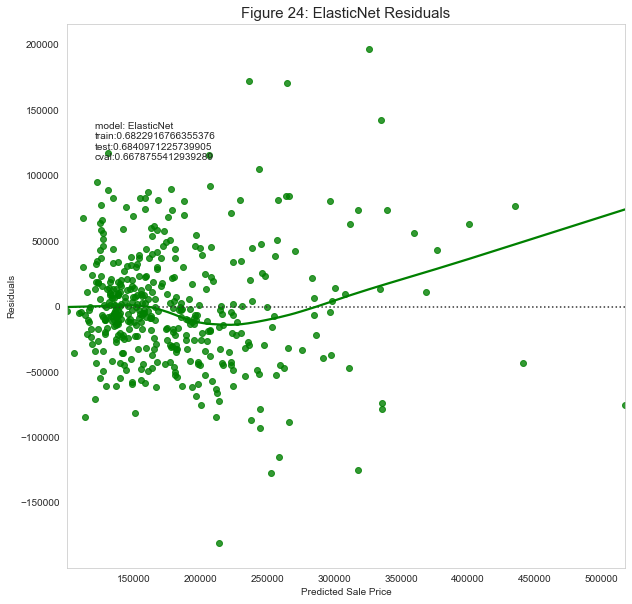

In [445]:
# plot the residuals
figure_number = 24
figure = plt.figure(figsize=(10, 10))
sns.residplot(y_val_preds, y_val, lowess=True, color="g")
plt.title(f'Figure {figure_number}: ElasticNet Residuals', fontsize=15)
plt.annotate(f'model: {model} \ntrain:{train_score}\ntest:{test_score}\ncval:{cval_score}', xy=(0.05, 0.75), xycoords='axes fraction')
plt.ylabel('Residuals')
plt.xlabel('Predicted Sale Price')
plt.savefig(f'../images/figure_no_{figure_number}_{model}.png')
plt.show();


In [446]:
# get the coefficients of the model as a dataframe
coefficients = pd.DataFrame(elasticnet.coef_, X.columns, columns=["Coefficients"])

# Inference variables
coefficients = coefficients # set to linear regression

largest_coef_value = coefficients['Coefficients'].sort_values(ascending=False)[0]
largest_coef_feature = coefficients['Coefficients'].sort_values(ascending=False).index[0]
smallest_coef_value = coefficients['Coefficients'].sort_values(ascending=False)[-1]
smallest_coef_feature = coefficients['Coefficients'].sort_values(ascending=False).index[-1]

# Inference on the coefficients
print(f'A one unit increase in {largest_coef_feature}, holding all other features constant, will result in a {coefficients.loc[largest_coef_feature, "Coefficients"]} log-unit increase in saleprice.') # log unit increase, because we are using regularized regression

print(f'A one unit decrease in {smallest_coef_feature}, holding all other features constant, will result in a {coefficients.loc[smallest_coef_feature, "Coefficients"]} log-unit increase in saleprice.')

largest_coefs_four_elasticnet = coefficients['Coefficients'].sort_values(ascending=False)[0:4]
smallest_coefs_four_elasticnet = coefficients['Coefficients'].sort_values(ascending=False)[-4:]


A one unit increase in basement_visible_surface_area, holding all other features constant, will result in a 30536.155106619077 log-unit increase in saleprice.
A one unit decrease in wood_deck_sf, holding all other features constant, will result in a 8405.953132853001 log-unit increase in saleprice.


Differences between Lasso and Ridge Models:
* Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity. It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.
* Lasso: Along with shrinking coefficients, lasso performs feature selection as well. (Remember the ‘selection‘ in the lasso full-form?) As we observed earlier, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model. Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

source: https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

Now, I want to display the most impactful features in the models that I have created after evaluating which of the models is the best fit for our scenario where we have a R2 goal of at least 0.8 and a RMSE goal of less than 40,000.

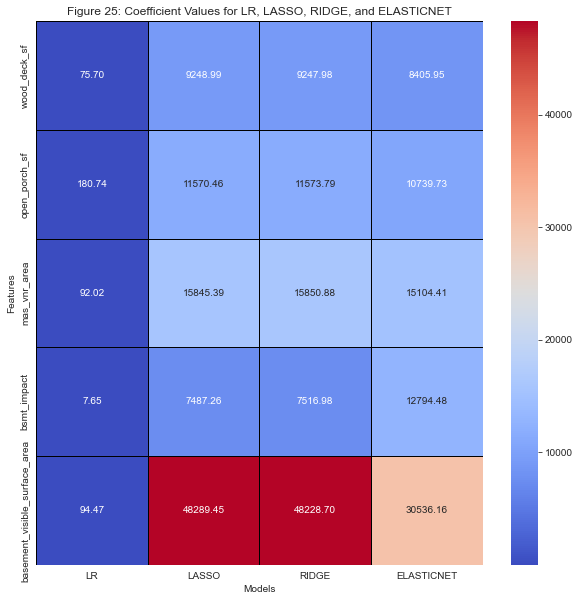

In [447]:
# comparing the coefficient values for LR, LASSO, RIDGE, and ELASTICNET
# Figure Description: This seaborn heatmap shows the coefficient values for each of the models, and the features as the x and y axis labels.
figure_number = 25
figure = plt.figure(figsize=(10, 10))
sns.heatmap(pd.DataFrame({'LR': lr.coef_, 'LASSO': lasso.coef_, 'RIDGE': ridge.coef_, 'ELASTICNET': elasticnet.coef_}, index=X.columns), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title(f'Figure {figure_number}: Coefficient Values for LR, LASSO, RIDGE, and ELASTICNET')
plt.savefig(f'../images/figure_no_{figure_number}_coefficient_values_for_LR_LASSO_RIDGE_and_ELASTICNET.png')
plt.xlabel('Models')
plt.ylabel('Features')
plt.show();


When interpreting this figure, consider that Lasso, Ridge, and ElasticNet are all regularized models. This means that they are penalized for having too many features. When we interpret these coefficients we say that changes in the feature result in a increase or decrease in the log-odds rather than the odds themselves.



In [448]:

data = pd.DataFrame.from_dict(model_scores, orient='index').T


In [449]:
data.head()

,lr,lasso,ridge,elasticnet
0,0.708675,0.708675,0.708724,0.684097


<AxesSubplot:title={'center':'Figure 26: Model Scores'}>

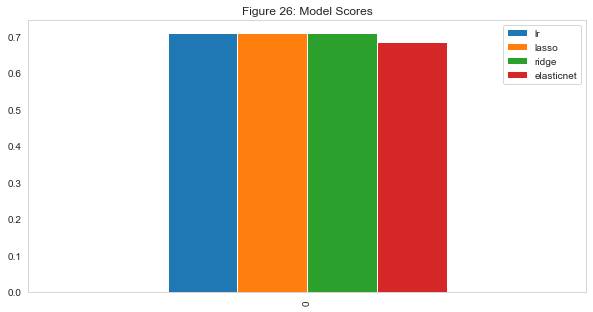

In [450]:
figure_number = 26
data.plot(kind='bar', figsize=(10, 5), title=f'Figure {figure_number}: Model Scores')

In [451]:
model_predictions = pd.DataFrame(model_predictions)
model_predictions.head()

,lr,lasso,ridge,elasticnet
0,139064.532884,139064.533027,139063.946289,143745.973606
1,401492.869121,401492.869025,401289.325636,334989.246314
2,70337.552411,70337.552589,70423.430371,100286.010189
3,168410.098636,168410.098609,168459.061026,179297.388131
4,356146.743645,356146.743323,355947.772448,297356.673366


In [452]:
# combine model_predictions and model_scores into a single dataframe with a added column for the model name.
model_df = pd.DataFrame()
for model in model_predictions.columns:
    row = {'model': model, 'predictions': model_predictions[model].to_list(), 'score': model_scores[model]}
    model_df = model_df.append(row, ignore_index=True)
model_df.head()

/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/3110391939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(row, ignore_index=True)
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/3110391939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(row, ignore_index=True)
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/3110391939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(row, ignore_index=True)
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_23475/3110391939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,model,predictions,score
0,lr,"[139064.53288393107, 401492.86912111804, 70337...",0.708675
1,lasso,"[139064.53302706563, 401492.86902536097, 70337...",0.708675
2,ridge,"[139063.94628900877, 401289.32563649, 70423.43...",0.708724
3,elasticnet,"[143745.97360575214, 334989.2463138233, 100286...",0.684097


In [453]:
len(y_val), len(model_df['predictions'][3])

(414, 414)

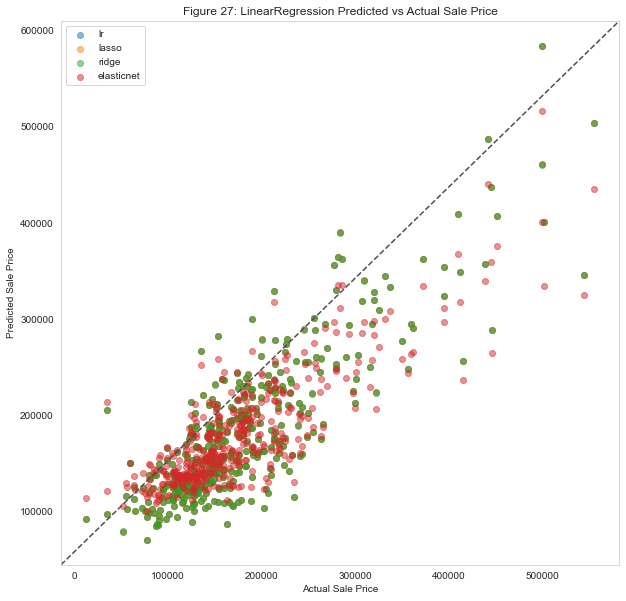

In [454]:
# Plot the predictions vs the actual values
figure_number = 27
model_name = 'LinearRegression'
plt.figure(figsize=(10, 10))

plt.scatter(y_val, model_df['predictions'][0], alpha = 0.5) # plot the predictions vs the actual values for the first model lr
plt.scatter(y_val, model_df['predictions'][1],alpha = 0.5) # plot the predictions vs the actual values for lasso
plt.scatter(y_val, model_df['predictions'][2],alpha = 0.5) # plot the predictions vs the actual values for ridge
plt.scatter(y_val, model_df['predictions'][3],alpha = 0.5) # plot the predictions vs the actual values for the elasticnet model
plt.plot([0, 1], [0, 1], 
         transform=plt.gca().transAxes, ls="--", c=".3")
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title(f'Figure {figure_number}: {model_name} Predicted vs Actual Sale Price')
plt.legend(['lr', 'lasso', 'ridge', 'elasticnet'])
plt.savefig(f'../images/figure_no_{figure_number}_{model_name}_actual_vs_predicted.png')
plt.show();

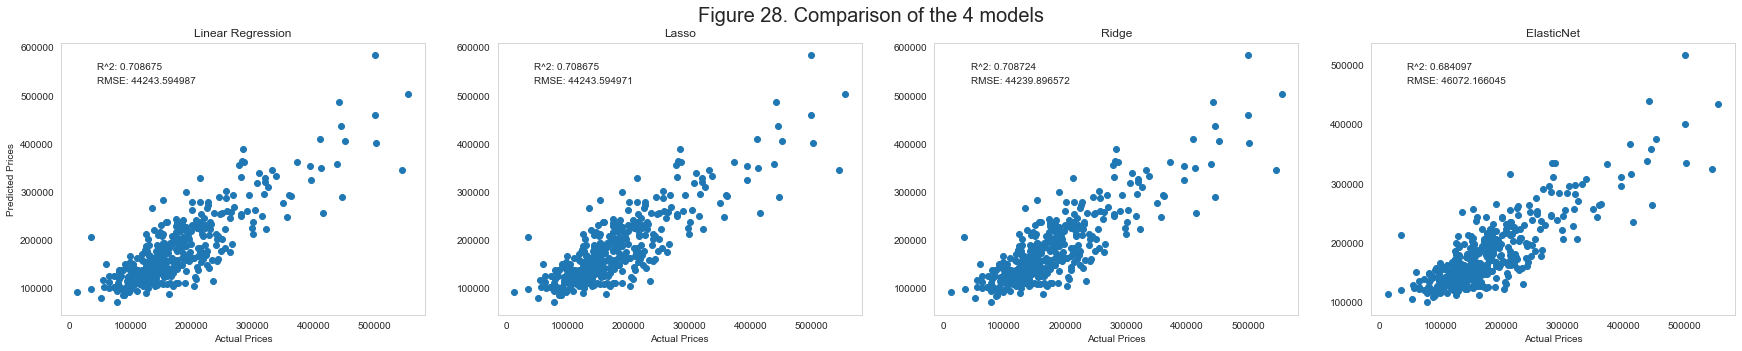

In [455]:


#TODO --- lr is not using Scaled data... correct that
df = pd.DataFrame({'lr': lr.coef_, 'lasso': lasso.coef_, 'ridge': ridge.coef_, 'elasticnet': elasticnet.coef_}, index=X.columns)

figure_number = 28# plot the residuals

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30,5))
axes[0].scatter(y_val, lr.predict(X_val_lr))
axes[1].scatter(y_val, lasso.predict(X_val))
axes[2].scatter(y_val, ridge.predict(X_val))
axes[3].scatter(y_val, elasticnet.predict(X_val))
plt.suptitle(f'Figure {figure_number}. Comparison of the 4 models',fontsize = 20)
axes[0].set_xlabel("Actual Prices") # set the x label
axes[0].set_ylabel("Predicted Prices") # set the y label
axes[0].set_title("Linear Regression") # set the title
axes[1].set_title("Lasso")
axes[1].set_xlabel("Actual Prices") # set the x label
axes[3].set_xlabel("Actual Prices") # set the x label
axes[2].set_xlabel("Actual Prices") # set the x label
axes[2].set_title("Ridge")
axes[3].set_title("ElasticNet")

axes[0].annotate(f'R^2: {round(lr.score(X_val_lr, y_val),6)}', xy=(0.1, 0.9), xycoords='axes fraction')
axes[0].annotate(f'RMSE: {round(np.sqrt(mean_squared_error(y_val, lr.predict(X_val_lr))),6)}', xy=(0.1, 0.85), xycoords='axes fraction')
axes[1].annotate(f'R^2: {round(lasso.score(X_val, y_val),6)}', xy=(0.1, 0.9), xycoords='axes fraction')
axes[1].annotate(f'RMSE: {round(np.sqrt(mean_squared_error(y_val, lasso.predict(X_val))),6)}', xy=(0.1, 0.85), xycoords='axes fraction')
axes[2].annotate(f'R^2: {round(ridge.score(X_val, y_val),6)}', xy=(0.1, 0.9), xycoords='axes fraction')
axes[2].annotate(f'RMSE: {round(np.sqrt(mean_squared_error(y_val, ridge.predict(X_val))),6)}', xy=(0.1, 0.85), xycoords='axes fraction')
axes[3].annotate(f'R^2: {round(elasticnet.score(X_val, y_val),6)}', xy=(0.1, 0.9), xycoords='axes fraction')
axes[3].annotate(f'RMSE: {round(np.sqrt(mean_squared_error(y_val, elasticnet.predict(X_val))),6)}', xy=(0.1, 0.85), xycoords='axes fraction')
plt.savefig(f"../images/figure_no_{figure_number}_basic_comparison_of_the_4_models.png")
plt.show()


# Conclusions and Recommendations

In [456]:
model_scores_df.head()

,model_name,r2_score,rmse_score,train_score,test_score,cval_score
0,LinearRegression,0.708675,44243.594987,0.719437,0.708675,0.702711
1,Lasso,0.708675,44243.594971,0.719437,0.708675,0.702711
2,Ridge,0.708724,44239.896572,0.719437,0.708724,0.702719
3,ElasticNet,0.684097,46072.166045,0.682292,0.684097,0.667876


The results show that (based on r2 scores) the lr and lasso models are tied but lasso reduces RMSE by a very tiny percentage.
The best RMSE score is from the Ridge model (44239.896572). We would either want to boost this model, to increase the complexity or we may want to consider adding more features into the analysis to increase the R2 score. 

# Conclusions and Final Remarks
Based on the results of this regression analysis, we can conclude that the following features are the most important in predicting the sale price of a house in Ames, Iowa.

* `overall_qual`
* `gr_liv_area`
* `garage_area`
* `garage_cars`
* `total_bsmt_sf`

We recommend that our client take time and focus on the following features to find the ideal property to purchase.

The primary features that we recommend our client focus on are `overall_qual`, `gr_liv_area`, `garage_area`, `garage_cars`, and `total_bsmt_sf`.


This project has been quite successful. We were able to develop a predictive model using only publicly available information about a home's features. This allows us to make predictions based solely on the public record without spending any money or effort to gather more data ourselves. In addition to being cost-effective, it also provides a quick solution to identify properties that may be worth purchasing. Our model shows some promise; however, we would like to investigate whether there is anything else that could improve its performance. For example, perhaps we can use machine learning techniques such as boosting to predict the sale price better.
To continue improving our model, we plan to run the same regression analysis on additional data sets. Ames rental data is an exciting area for further study, and we are considering recommending this to our clients as a way to see an ROI on their investment quicker than with the purchase market. Additionally, we believe that adding additional features to our model might help us achieve even higher accuracy rates.




# References

[1] De Cock, Dean. "Ames, Iowa: Alternative to the Boston housing data as an end of semester regression project." Journal of Statistics Education 19.3 (2011).

[2] https://www.python-graph-gallery.com/web-ggbetweenstats-with-matplotlib
